In [1]:
#packages 
import numpy as np
from numpy import sin, cos
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import csv
import timeit # timer 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.transforms import Bbox

from scipy.ndimage import gaussian_filter1d

plt.rcParams['figure.figsize'] = [6.9, 4.6]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
red_col = '#A00909'

def legend_title_left(leg):
    c = leg.get_children()[0]
    title = c.get_children()[0]
    hpack = c.get_children()[1]
    c._children = [hpack]
    hpack._children = [title] + hpack.get_children()

In [2]:
def cost_function1(state, control):
    x1, x2, x3, x4 = state
    cost = 12*(x1**2)*(sin((1/3)*x1)**2)
    return cost

def cost_function2(state, control):
    x1, x2, x3, x4 = state
    cost = 6*(x1**2)*(cos(x2/2)**2)
    return cost

def cost_function3(state, control):
    x1, x2, x3, x4 = state
    cost = cost_function1(state, control) + cost_function2(state, control)
    return cost

def cost_function4(state, control):
    x1, x2, x3, x4 = state
    cost = 6*(x2**2)*(cos((1/3)*x1)**2)
    return cost

def cost_function5(state, control):
    x1, x2, x3, x4 = state
    cost = np.exp(-(x2/2.5)**2)*(75*x2**2)
    return cost

def cost_function6(state, control):
    x1, x2, x3, x4 = state
    cost = cost_function4(state, control) + cost_function5(state, control)
    return cost

def cost_function(state, control):
    x1, x2, x3, x4 = state
    cost = 6*(x1**2)*(2*(sin(x1/3)**2) + (cos(x2/2)**2)) + 3*(x2**2)*(2*((cos(x1/3))**2) + 25*np.exp(-(x2/2.5)**2)) + 0.05*x3**2 + 0.1*x4**2 + 0.5*control**2
    if abs(x1)> np.deg2rad(135):
        cost += 100
    return cost

# calculating contour plot values
x1_list = np.linspace(-np.deg2rad(135), np.deg2rad(135), 100)
x2_list = np.linspace(-np.deg2rad(270), np.deg2rad(270), 100)
x1, x2 = np.meshgrid(x1_list, x2_list)

Z1 = np.zeros((100, 100))
Z2 = np.zeros((100, 100))
Z3 = np.zeros((100, 100))
Z4 = np.zeros((100, 100))
Z5 = np.zeros((100, 100))
Z6 = np.zeros((100, 100))
Z = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        Z1[i][j] =  cost_function1(np.array([x1_list[j], x2_list[i], 0, 0]), 0)
        Z2[i][j] =  cost_function2(np.array([x1_list[j], x2_list[i], 0, 0]), 0) 
        Z3[i][j] =  cost_function3(np.array([x1_list[j], x2_list[i], 0, 0]), 0) 
        Z4[i][j] =  cost_function4(np.array([x1_list[j], x2_list[i], 0, 0]), 0)
        Z5[i][j] =  cost_function5(np.array([x1_list[j], x2_list[i], 0, 0]), 0)
        Z6[i][j] =  cost_function6(np.array([x1_list[j], x2_list[i], 0, 0]), 0)
        Z[i][j] =  cost_function(np.array([x1_list[j], x2_list[i], 0, 0]), 0)

max_weight_1 = max([np.max(Z1), np.max(Z2)])   
max_weight_2 = max([np.max(Z4), np.max(Z5)])

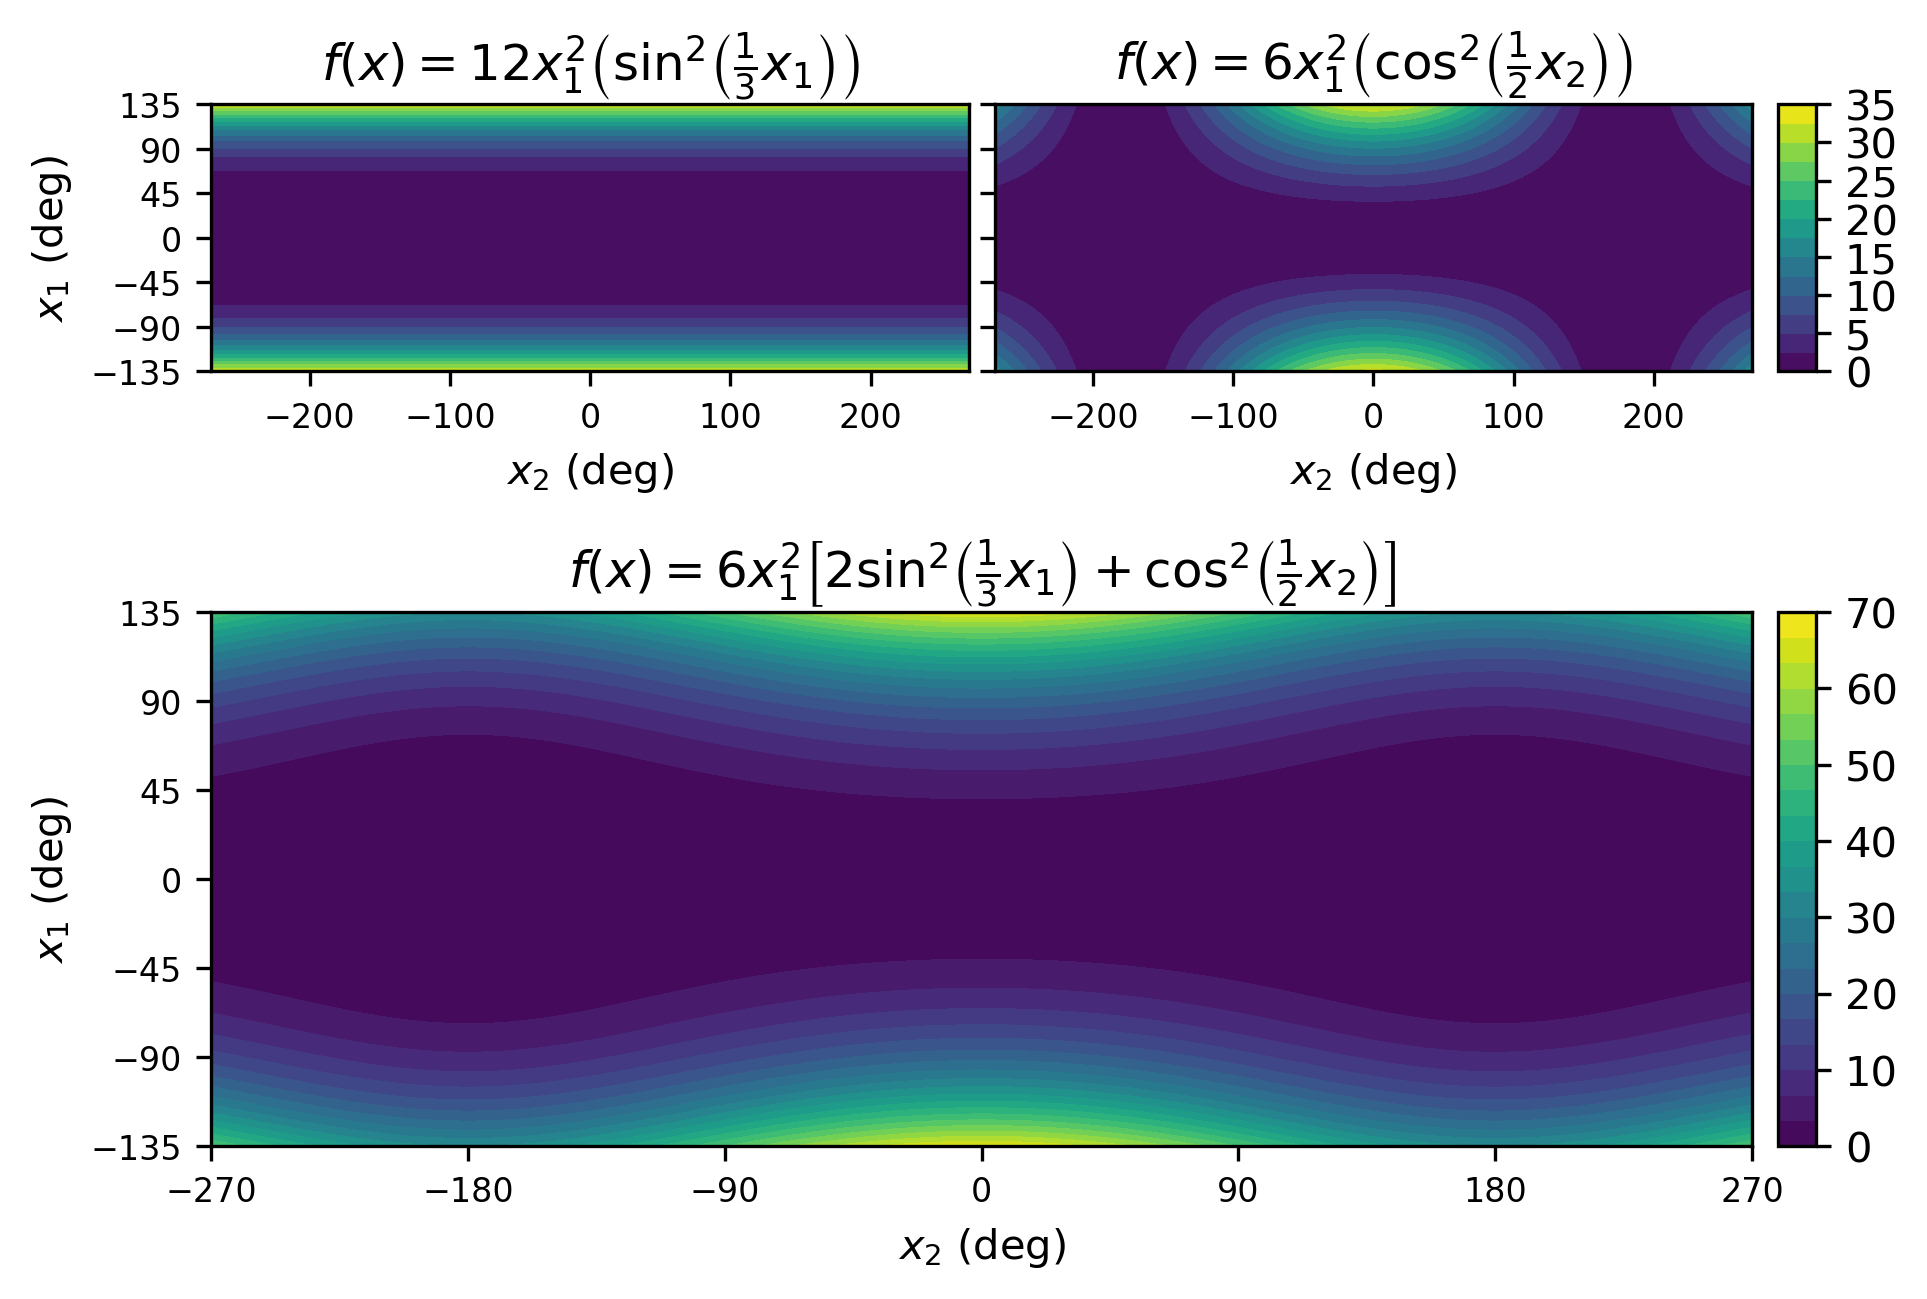

In [3]:
fig = plt.figure()

gs1 = GridSpec(2, 3, wspace= 0.05, hspace=0.6, width_ratios=[20, 20, 1], height_ratios=[1, 2])

# 2 smaller graphs
# contour intervals and step size 
step_size = 5
max_int = int(np.ceil(np.max([Z1, Z2])/step_size))*step_size
level_def = np.arange(0, max_int+5, 5, dtype= np.int32)

step_size = 2.5
max_int = int(np.ceil(np.max([Z1, Z2])/step_size))*step_size
level_def = np.arange(0, max_int + step_size, step_size)

ax1 = plt.subplot(gs1[0, 0])
cp1 = ax1.contourf(np.rad2deg(x2), np.rad2deg(x1), Z1, levels = 15, vmin = 0, vmax = max_int)

ax2 = plt.subplot(gs1[0, 1])
ax2.tick_params(labelbottom=True, labelleft=False)
cp2 = ax2.contourf(np.rad2deg(x2), np.rad2deg(x1), Z2, levels = 15, vmin = 0, vmax = max_int)

# larger graph
# contour intervals and step size 
step_size = 10
max_int = int(np.ceil(np.max(Z3)/step_size))*step_size
level_def = np.arange(0, max_int+10, 10, dtype= np.int32)

step_size = 10/3
max_int = int(np.ceil(np.max([Z3])/step_size))*step_size
level_def = np.arange(0, 70+step_size, step_size)

ax3 = plt.subplot(gs1[1, 0:2])
cp3 = ax3.contourf(np.rad2deg(x2), np.rad2deg(x1), Z3, levels = level_def, vmin = 0, vmax = 70)

# title 
ax1.set_title(r'$f(x) = 12x_1^2\left(\sin^2\left(\frac{1}{3}x_1\right)\right)$', loc='center', pad=None, size = 12)
ax2.set_title(r'$f(x) = 6x_1^2\left(\cos^2\left(\frac{1}{2}x_2\right) \right)$', loc='center', pad=None, size = 12)
ax3.set_title(r'$f(x) = 6x_1^2\left[2\sin^2\left(\frac{1}{3}x_1\right) + \cos^2\left(\frac{1}{2}x_2\right) \right]$', loc='center', pad=None, size = 12)

#axis labels
ax1.set_xlabel(r'$x_2$ (deg)', size = 10)
ax2.set_xlabel(r'$x_2$ (deg)', size = 10)
ax3.set_xlabel(r'$x_2$ (deg)', size = 10)
ax1.set_ylabel(r'$x_1$ (deg)', size = 10)
ax3.set_ylabel(r'$x_1$ (deg)', size = 10)

# axis limits
ax1.set_yticks(np.linspace(np.min(np.rad2deg(x1)), np.max(np.rad2deg(x1)), 7, dtype = np.int32))
ax2.set_yticks(np.linspace(np.min(np.rad2deg(x1)), np.max(np.rad2deg(x1)), 7, dtype = np.int32))
ax3.set_yticks(np.linspace(np.min(np.rad2deg(x1)), np.max(np.rad2deg(x1)), 7, dtype = np.int32))
ax3.set_xticks(np.linspace(np.min(np.rad2deg(x2)), np.max(np.rad2deg(x2)), 7, dtype = np.int32))

#axis font size
ax1.tick_params(axis='both', labelsize=8)
ax2.tick_params(axis='both', labelsize=8)
ax3.tick_params(axis='both', labelsize=8)

#colour bars
ax_cp1 = plt.subplot(gs1[0, 2])
col1 = plt.colorbar(cp1, cax = ax_cp1)
col1.set_ticks(np.arange(0, max_int+5, 5, dtype= np.int32))
col1.set_ticklabels(np.arange(0, max_int+5, 5, dtype= np.int32))

ax_cp3 = plt.subplot(gs1[1, 2])
col2 = plt.colorbar(cp3, cax = ax_cp3)
col2.set_ticks(np.arange(0, 80, 10, dtype= np.int32))
col2.set_ticklabels(np.arange(0, 80, 10, dtype= np.int32))

#fig.suptitle('Cost Functions Weighting $x_1$ Deviance', size = 20)
plt.savefig('x1dev.png', bbox_inches='tight')
plt.show()

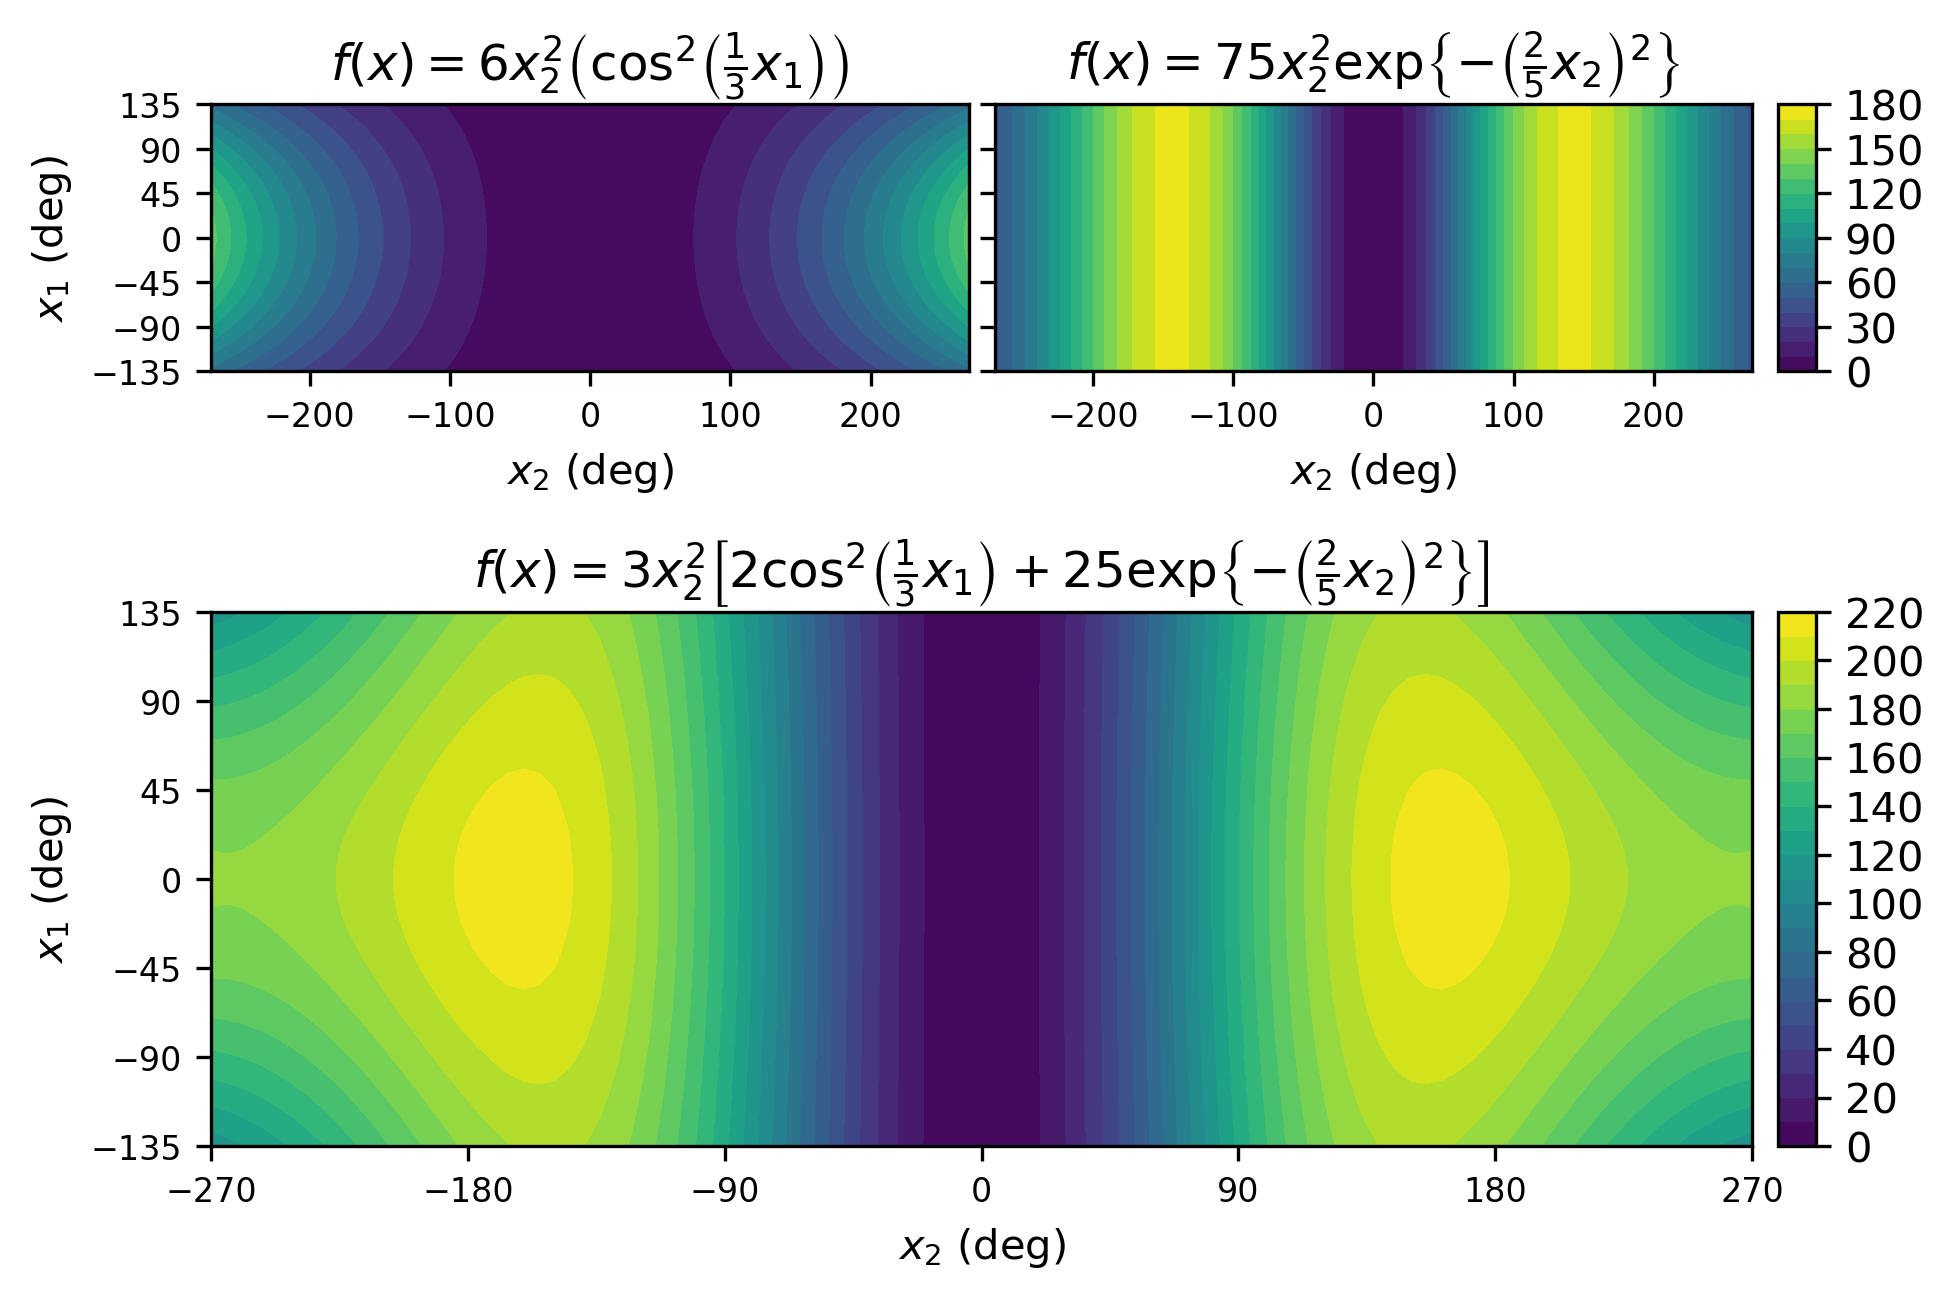

In [4]:
fig = plt.figure()

gs1 = GridSpec(2, 3, wspace= 0.05, hspace=0.6, width_ratios=[20, 20, 1], height_ratios=[1, 2])

# 2 smaller graphs
# contour intervals and step size 
step_size = 20
max_int = int(np.ceil(np.max([Z4, Z5])/step_size))*step_size
level_def = np.arange(0, max_int+10, 10, dtype= np.int32)

ax1 = plt.subplot(gs1[0, 0])
cp1 = ax1.contourf(np.rad2deg(x2), np.rad2deg(x1), Z4, levels = level_def, vmin = 0, vmax = max_int)

ax2 = plt.subplot(gs1[0, 1])
ax2.tick_params(labelbottom=True, labelleft=False)
cp2 = ax2.contourf(np.rad2deg(x2), np.rad2deg(x1), Z5, levels = level_def, vmin = 0, vmax = max_int)

# larger graph
# contour intervals and step size 
step_size = 20
max_int = int(np.ceil(np.max(Z6)/step_size))*step_size
level_def = np.arange(0, max_int+10, 10, dtype= np.int32)

ax3 = plt.subplot(gs1[1, 0:2])
cp3 = ax3.contourf(np.rad2deg(x2), np.rad2deg(x1), Z6, levels = level_def, vmin = 0, vmax = max_int)

# title 
ax1.set_title(r'$f(x) = 6x_2^2\left(\cos^2\left(\frac{1}{3}x_1\right)\right)$', loc='center', pad=None, size = 12)
ax2.set_title(r'$f(x) = 75x_2^2\exp\left\{-\left(\frac{2}{5}x_2\right)^2\right\}$', loc='center', pad=None, size = 12)
ax3.set_title(r'$f(x) = 3x_2^2\left[2\cos^2\left(\frac{1}{3}x_1\right) + 25\exp\left\{-\left(\frac{2}{5}x_2\right)^2\right\} \right]$', loc='center', pad=None, size = 12)

#axis labels
ax1.set_xlabel(r'$x_2$ (deg)', size = 10)
ax2.set_xlabel(r'$x_2$ (deg)', size = 10)
ax3.set_xlabel(r'$x_2$ (deg)', size = 10)
ax1.set_ylabel(r'$x_1$ (deg)', size = 10)
ax3.set_ylabel(r'$x_1$ (deg)', size = 10)

# axis limits
ax1.set_yticks(np.linspace(np.min(np.rad2deg(x1)), np.max(np.rad2deg(x1)), 7, dtype = np.int32))
ax2.set_yticks(np.linspace(np.min(np.rad2deg(x1)), np.max(np.rad2deg(x1)), 7, dtype = np.int32))
ax3.set_yticks(np.linspace(np.min(np.rad2deg(x1)), np.max(np.rad2deg(x1)), 7, dtype = np.int32))
ax3.set_xticks(np.linspace(np.min(np.rad2deg(x2)), np.max(np.rad2deg(x2)), 7, dtype = np.int32))

#axis font size
ax1.tick_params(axis='both', labelsize=8)
ax2.tick_params(axis='both', labelsize=8)
ax3.tick_params(axis='both', labelsize=8)

#colour bars
ax_cp1 = plt.subplot(gs1[0, 2])
col1 = plt.colorbar(cp1, cax = ax_cp1)
col1.set_ticks(np.arange(0, max_int+10, 30, dtype= np.int32))
col1.set_ticklabels(np.arange(0, max_int+10, 30, dtype= np.int32))

ax_cp3 = plt.subplot(gs1[1, 2])
col2 = plt.colorbar(cp3, cax = ax_cp3)
col2.set_ticks(np.arange(0, max_int+10, 20, dtype= np.int32))
col2.set_ticklabels(np.arange(0, max_int+10, 20, dtype= np.int32))

# save and show
plt.savefig('x2dev.png', bbox_inches='tight')
plt.show()

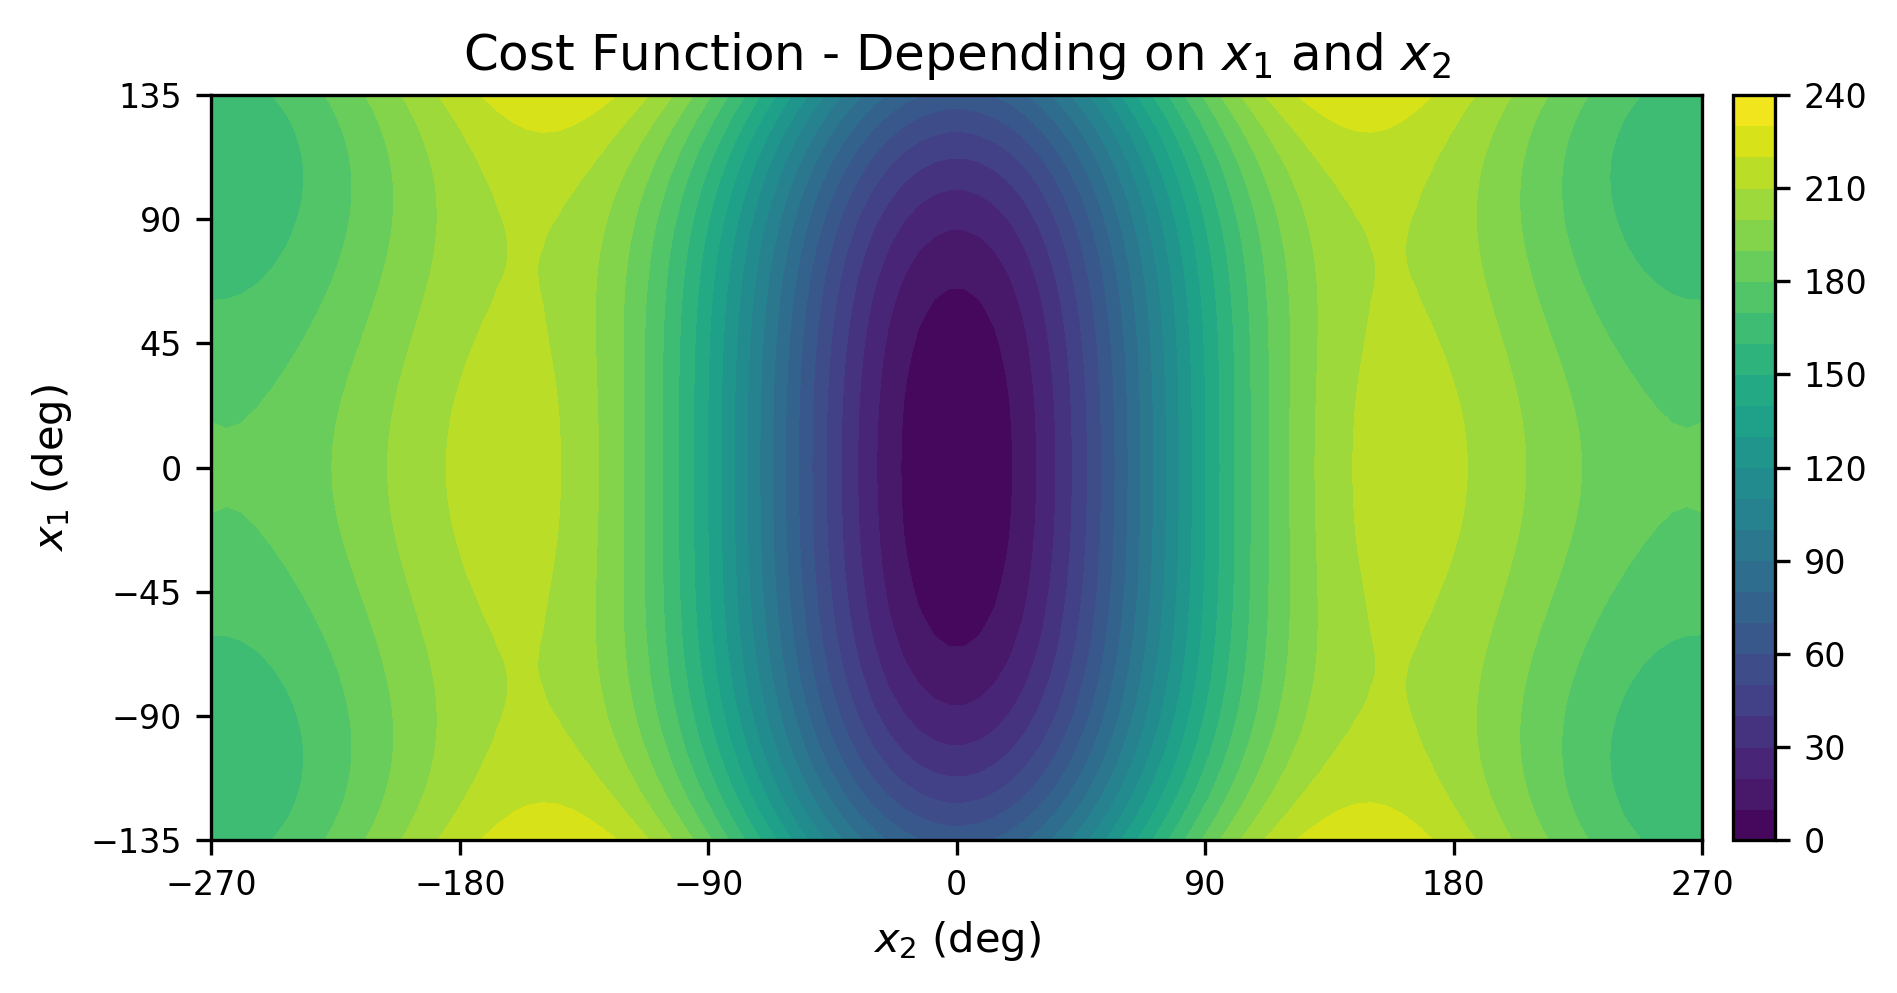

In [5]:
# calculating contour plot values
x1_list = np.linspace(-np.deg2rad(135), np.deg2rad(135), 100)
x2_list = np.linspace(-np.deg2rad(270), np.deg2rad(270), 100)
x1, x2 = np.meshgrid(x1_list, x2_list)

for i in range(100):
    for j in range(100):
        Z[i][j] =  cost_function(np.array([x1_list[j], x2_list[i], 0, 0]), 0)

# plotting full cost function
fig = plt.figure()

gs1 = GridSpec(1, 2, wspace= 0.05, hspace=0.6, width_ratios=[20, 1], height_ratios=[1])

# contour intervals and step size 
step_size = 30
max_int = int(np.ceil(np.max(Z)/step_size))*step_size
level_def = np.arange(0, max_int+10, 10, dtype= np.int32)

# contour plot
ax = plt.subplot(gs1[0, 0])
ax.set_aspect(aspect=1)
cp = ax.contourf(np.rad2deg(x2), np.rad2deg(x1), Z, levels = level_def, vmin = 0, vmax = max_int)

# colour bars
ax_cp = plt.subplot(gs1[0, 1])
col = plt.colorbar(cp, cax = ax_cp)

# labels
ax.set_title(r'Cost Function - Depending on $x_1$ and $x_2$', size = 12)
ax.set_xlabel(r'$x_2$ (deg)', size = 10)
ax.set_ylabel(r'$x_1$ (deg)', size = 10)

# axis limits
ax.set_xticks(np.linspace(np.min(np.rad2deg(x2)), np.max(np.rad2deg(x2)), 7, dtype = np.int32))
ax.set_yticks(np.linspace(np.min(np.rad2deg(x1)), np.max(np.rad2deg(x1)), 7, dtype = np.int32))

# axis font size
ax.tick_params(axis='both', labelsize=8)
ax_cp.tick_params(axis='both', labelsize=8)

# adjust colour plot to be same length
contour_size = ax.get_position().get_points()
cb_size = ax_cp.get_position().get_points()
cb_size[0, 1] = contour_size[0, 1]
cb_size[1, 1] = contour_size[1, 1]
cb_size[0, 0] = contour_size[1, 0] + 0.015
cb_size[1, 0] = cb_size[0, 0] + 0.02
ax_cp.set_position(Bbox(cb_size))

# save and show
plt.savefig('costfun.png', bbox_inches='tight')
plt.show()

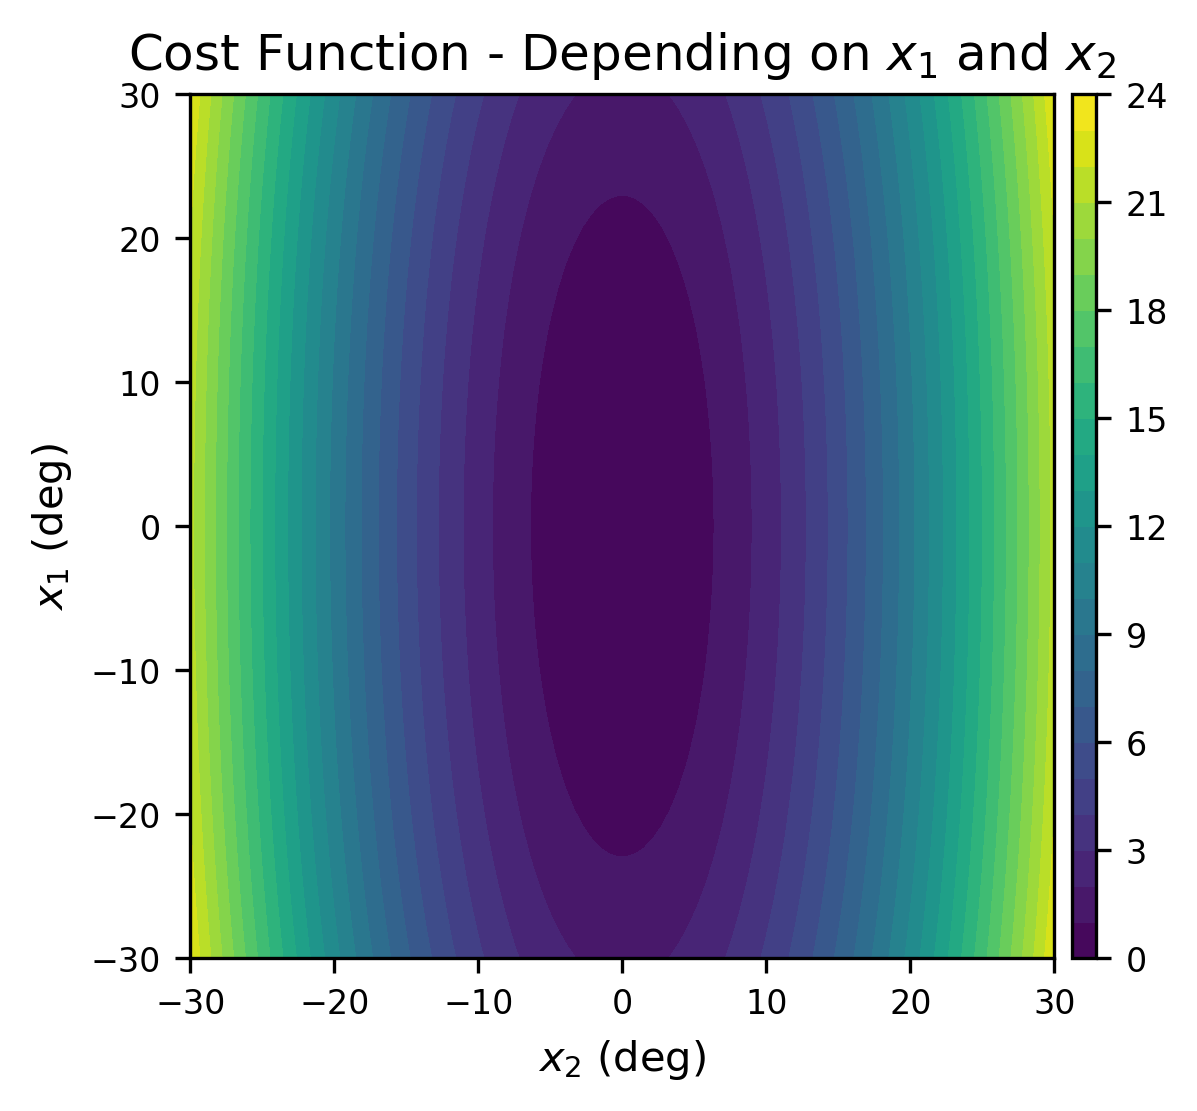

In [6]:
# calculating contour plot values
x1_list = np.linspace(-np.deg2rad(30), np.deg2rad(30), 100)
x2_list = np.linspace(-np.deg2rad(30), np.deg2rad(30), 100)
x1, x2 = np.meshgrid(x1_list, x2_list)

for i in range(100):
    for j in range(100):
        Z[i][j] =  cost_function(np.array([x1_list[j], x2_list[i], 0, 0]), 0)

# plotting full cost function
#fig = plt.figure()
fig = plt.figure(figsize = [4, 4])

gs1 = GridSpec(1, 2, wspace= 0.05, hspace=0.6, width_ratios=[20, 1], height_ratios=[1])

# contour intervals and step size 
step_size = 3
max_int = int(np.ceil(np.max(Z)/step_size))*step_size
level_def = np.arange(0, max_int+1, 1, dtype= np.int32)

# contour plot
ax = plt.subplot(gs1[0, 0])
ax.set_aspect(aspect=1)
cp = ax.contourf(np.rad2deg(x2), np.rad2deg(x1), Z, levels = level_def, vmin = 0, vmax = max_int)

# colour bars
ax_cp = plt.subplot(gs1[0, 1])
col = plt.colorbar(cp, cax = ax_cp)

# labels
ax.set_title(r'Cost Function - Depending on $x_1$ and $x_2$', size = 12)
ax.set_xlabel(r'$x_2$ (deg)', size = 10)
ax.set_ylabel(r'$x_1$ (deg)', size = 10)

# axis limits
#ax.set_xticks(np.linspace(np.min(np.rad2deg(x2)), np.max(np.rad2deg(x2)), 7, dtype = np.int32))
#ax.set_yticks(np.linspace(np.min(np.rad2deg(x1)), np.max(np.rad2deg(x1)), 7, dtype = np.int32))

# axis font size
ax.tick_params(axis='both', labelsize=8)
ax_cp.tick_params(axis='both', labelsize=8)

# adjust colour plot to be same length
contour_size = ax.get_position().get_points()
cb_size = ax_cp.get_position().get_points()
cb_size[0, 1] = contour_size[0, 1]
cb_size[1, 1] = contour_size[1, 1]
cb_size[0, 0] = contour_size[1, 0] + 0.015
cb_size[1, 0] = cb_size[0, 0] + 0.02
ax_cp.set_position(Bbox(cb_size))

# save and show
plt.savefig('closecostfun.png', bbox_inches='tight')
plt.show()

In [7]:
# graph values
theta_vals = np.linspace(-150, 150, 100)
theta_costs = np.zeros(100)

alpha_vals = np.linspace(-300, 300, 100)
alpha_costs = np.zeros(100)

theta_dot_vals = np.linspace(-20, 20, 100)
theta_dot_costs = np.zeros(100)

alpha_dot_vals = np.linspace(-20, 20, 100)
alpha_dot_costs = np.zeros(100)

control_vals = np.linspace(-20, 20, 100)
control_costs = np.zeros(100)

for i in range(100):
    theta_costs[i] = cost_function(np.array([np.deg2rad(theta_vals[i]), 0, 0, 0]), 0)
    alpha_costs[i] = cost_function(np.array([0, np.deg2rad(alpha_vals[i]), 0, 0]), 0)
    theta_dot_costs[i] = cost_function(np.array([0, 0, theta_dot_vals[i], 0]), 0)
    alpha_dot_costs[i] = cost_function(np.array([0, 0, 0, alpha_dot_vals[i]]), 0)
    control_costs[i] = cost_function(np.array([0, 0, 0, 0]), control_vals[i])

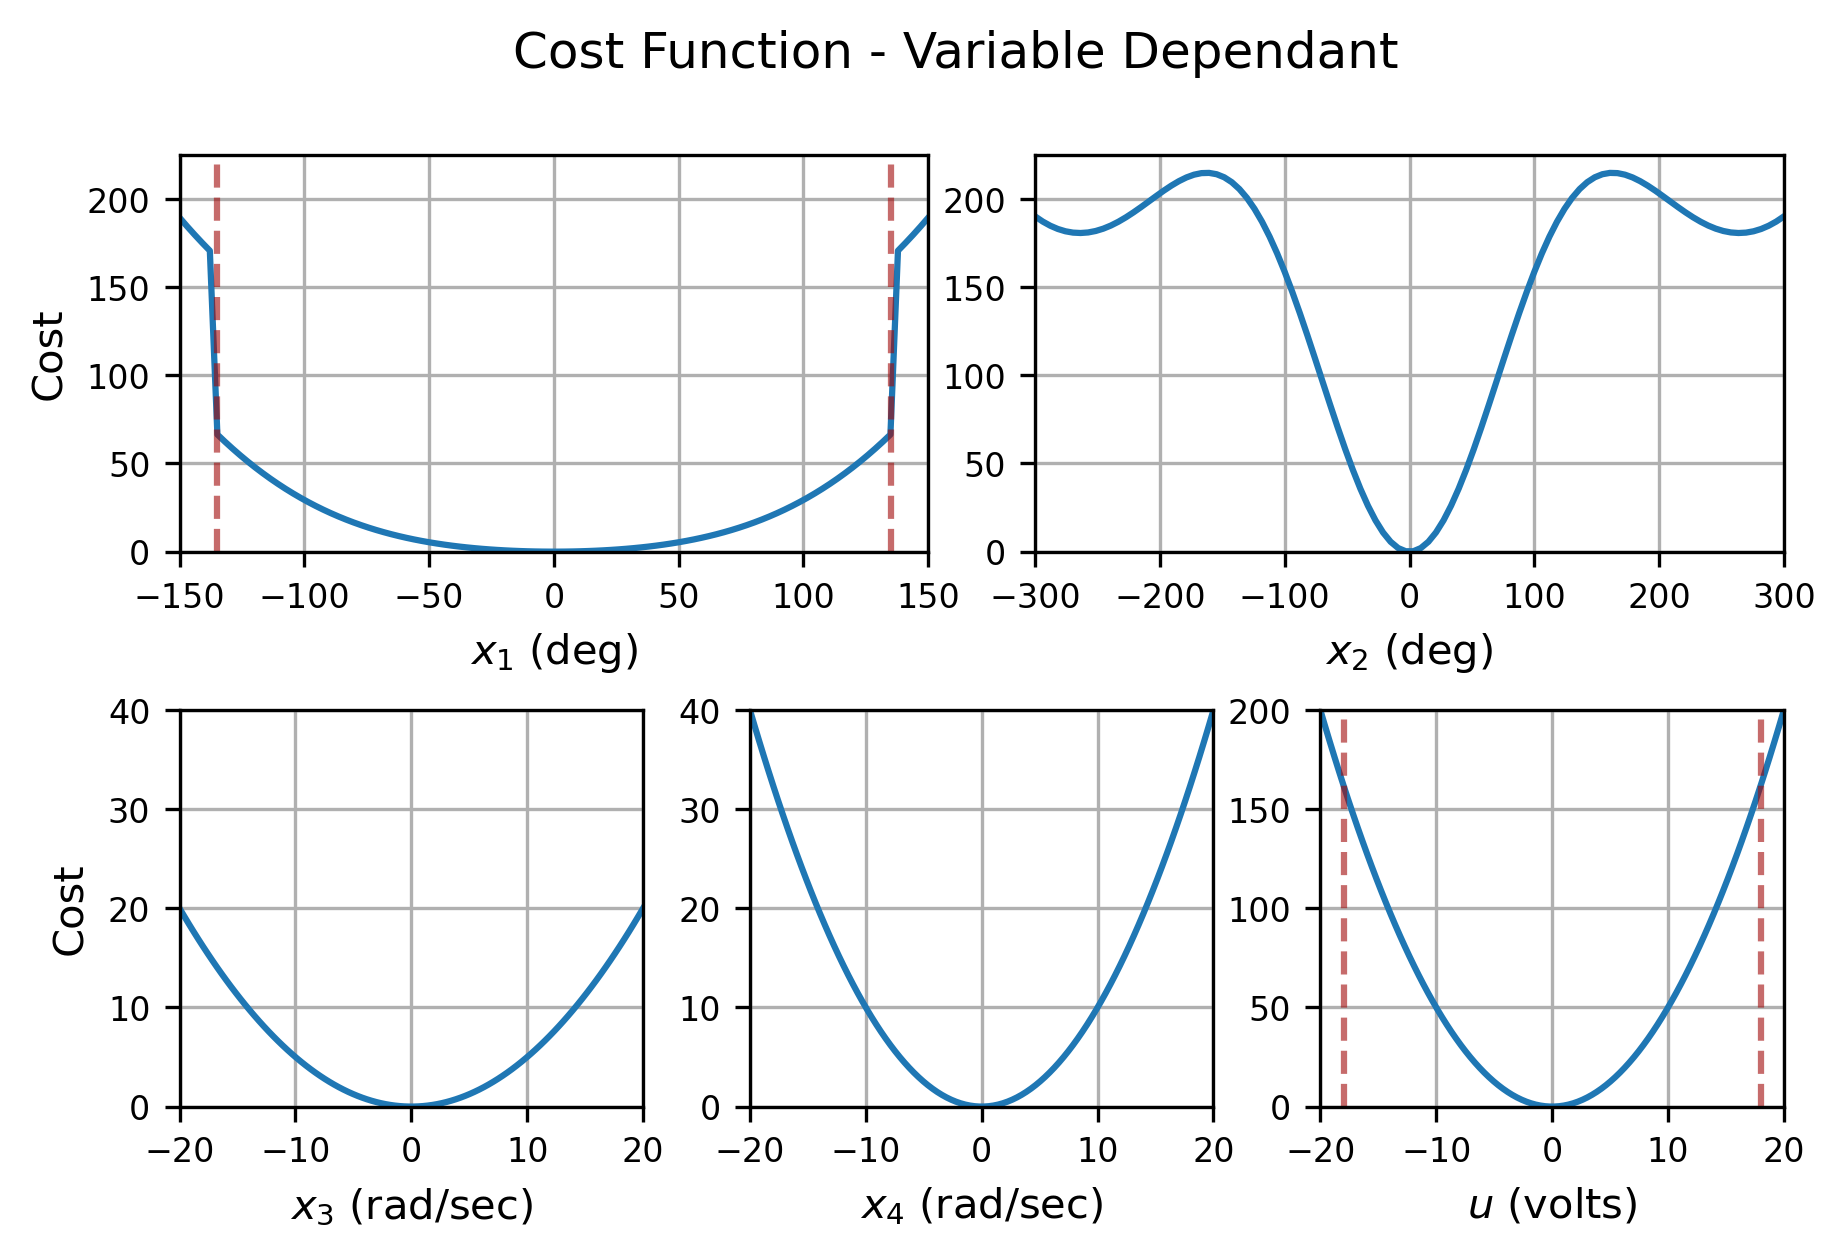

In [8]:
# graphing 
fig = plt.figure(figsize = [6.9, 4.2])

gs1 = GridSpec(2, 6, wspace=0.6, hspace=0.4, width_ratios=[1, 1, 1, 1, 1, 1], height_ratios=[1, 1])

ax2 = plt.subplot(gs1[0, 3:6])
ax2.plot(alpha_vals, alpha_costs)
ax2.grid()
ax2.set_xlim(left=min(alpha_vals), right=max(alpha_vals))
ax2.set_ylim(bottom=0, top = max(alpha_costs)+10)

ax1 = plt.subplot(gs1[0, 0:3], sharey = ax2)
ax1.plot(theta_vals, theta_costs)
ax1.grid()
ax1.axvline(-135, color = red_col, linestyle = 'dashed', alpha = 0.6)
ax1.axvline(135, color = red_col, linestyle = 'dashed', alpha = 0.6)
ax1.set_xlim(left=min(theta_vals), right=max(theta_vals))
ax1.set_ylim(bottom=0)

ax3 = plt.subplot(gs1[1, 0:2])
ax3.plot(theta_dot_vals, theta_dot_costs)
ax3.grid()
ax3.set_xlim(left=min(theta_dot_vals), right=max(theta_dot_vals))
ax3.set_ylim(bottom=0)

ax4 = plt.subplot(gs1[1, 2:4], sharey = ax3)
ax4.plot(alpha_dot_vals, alpha_dot_costs)
ax4.grid()
ax4.set_xlim(left=min(alpha_dot_vals), right=max(alpha_dot_vals))
ax4.set_ylim(bottom=0, top = max(alpha_dot_costs))

ax5 = plt.subplot(gs1[1, 4:6])
ax5.plot(control_vals, control_costs)
ax5.grid()
ax5.set_xlim(left=min(control_vals), right=max(control_vals))
ax5.set_ylim(bottom=0, top = max(control_costs))
ax5.axvline(-18, color = red_col, linestyle = 'dashed', alpha = 0.6)
ax5.axvline(18, color = red_col, linestyle = 'dashed', alpha = 0.6)

#axis labels
ax1.set_ylabel(r'Cost', size = 10)
ax3.set_ylabel(r'Cost', size = 10)

ax1.set_xlabel(r'$x_1$ (deg)', size = 10)
ax2.set_xlabel(r'$x_2$ (deg)', size = 10)
ax3.set_xlabel(r'$x_3$ (rad/sec)', size = 10)
ax4.set_xlabel(r'$x_4$ (rad/sec)', size = 10)
ax5.set_xlabel(r'$u$ (volts)', size = 10)

# axis font size
ax1.tick_params(axis='both', labelsize=8)
ax2.tick_params(axis='both', labelsize=8)
ax3.tick_params(axis='both', labelsize=8)
ax4.tick_params(axis='both', labelsize=8)
ax5.tick_params(axis='both', labelsize=8)

fig.suptitle('Cost Function - Variable Dependant', size = 12)

# save and show
plt.savefig('costvar.png', bbox_inches='tight')
plt.show()

# Static Simulation Data Analysis

In [9]:
static_data= pd.read_csv("static_results.csv")
result_length = int(max(static_data.time)/0.025 + 1)
static_grouped_time = static_data.groupby('time')

In [10]:
# seperate runs 
static_results_1 = static_data.loc[0*result_length:1*result_length - 1]
static_results_2 = static_data.loc[1*result_length:2*result_length - 1]
static_results_3 = static_data.loc[2*result_length:3*result_length - 1]
static_results_4 = static_data.loc[3*result_length:4*result_length - 1]
static_results_5 = static_data.loc[4*result_length:5*result_length - 1]

# replace indexs
new_index = pd.Series(np.linspace(0, result_length-1, result_length), dtype = np.int32)

static_results_1 = static_results_1.set_index(new_index)
static_results_2 = static_results_2.set_index(new_index)
static_results_3 = static_results_3.set_index(new_index)
static_results_4 = static_results_4.set_index(new_index)
static_results_5 = static_results_5.set_index(new_index)

In [11]:
static_results_list = [static_results_1, static_results_2, static_results_3, static_results_4, static_results_5]

count = 1
for j in static_results_list:
    total_costs = sum(j.stage_cost)
    total_time = sum(j.calc_time)
    print(f'Total Cost for Simulation {count}:', '{:.3f}'.format(total_costs), 'Run Time: {:.3f}'.format(total_time))
    count += 1
    
print(f'\nAverage Cost:', '{:.3f}'.format(sum(static_data.stage_cost)/5), 'Average Run Time: {:.3f}'.format(sum(static_data.calc_time)/5))

Total Cost for Simulation 1: 15199.361 Run Time: 1754.913
Total Cost for Simulation 2: 13207.059 Run Time: 1760.201
Total Cost for Simulation 3: 11272.173 Run Time: 1758.923
Total Cost for Simulation 4: 14789.284 Run Time: 1765.142
Total Cost for Simulation 5: 14424.304 Run Time: 1767.611

Average Cost: 13778.436 Average Run Time: 1761.358


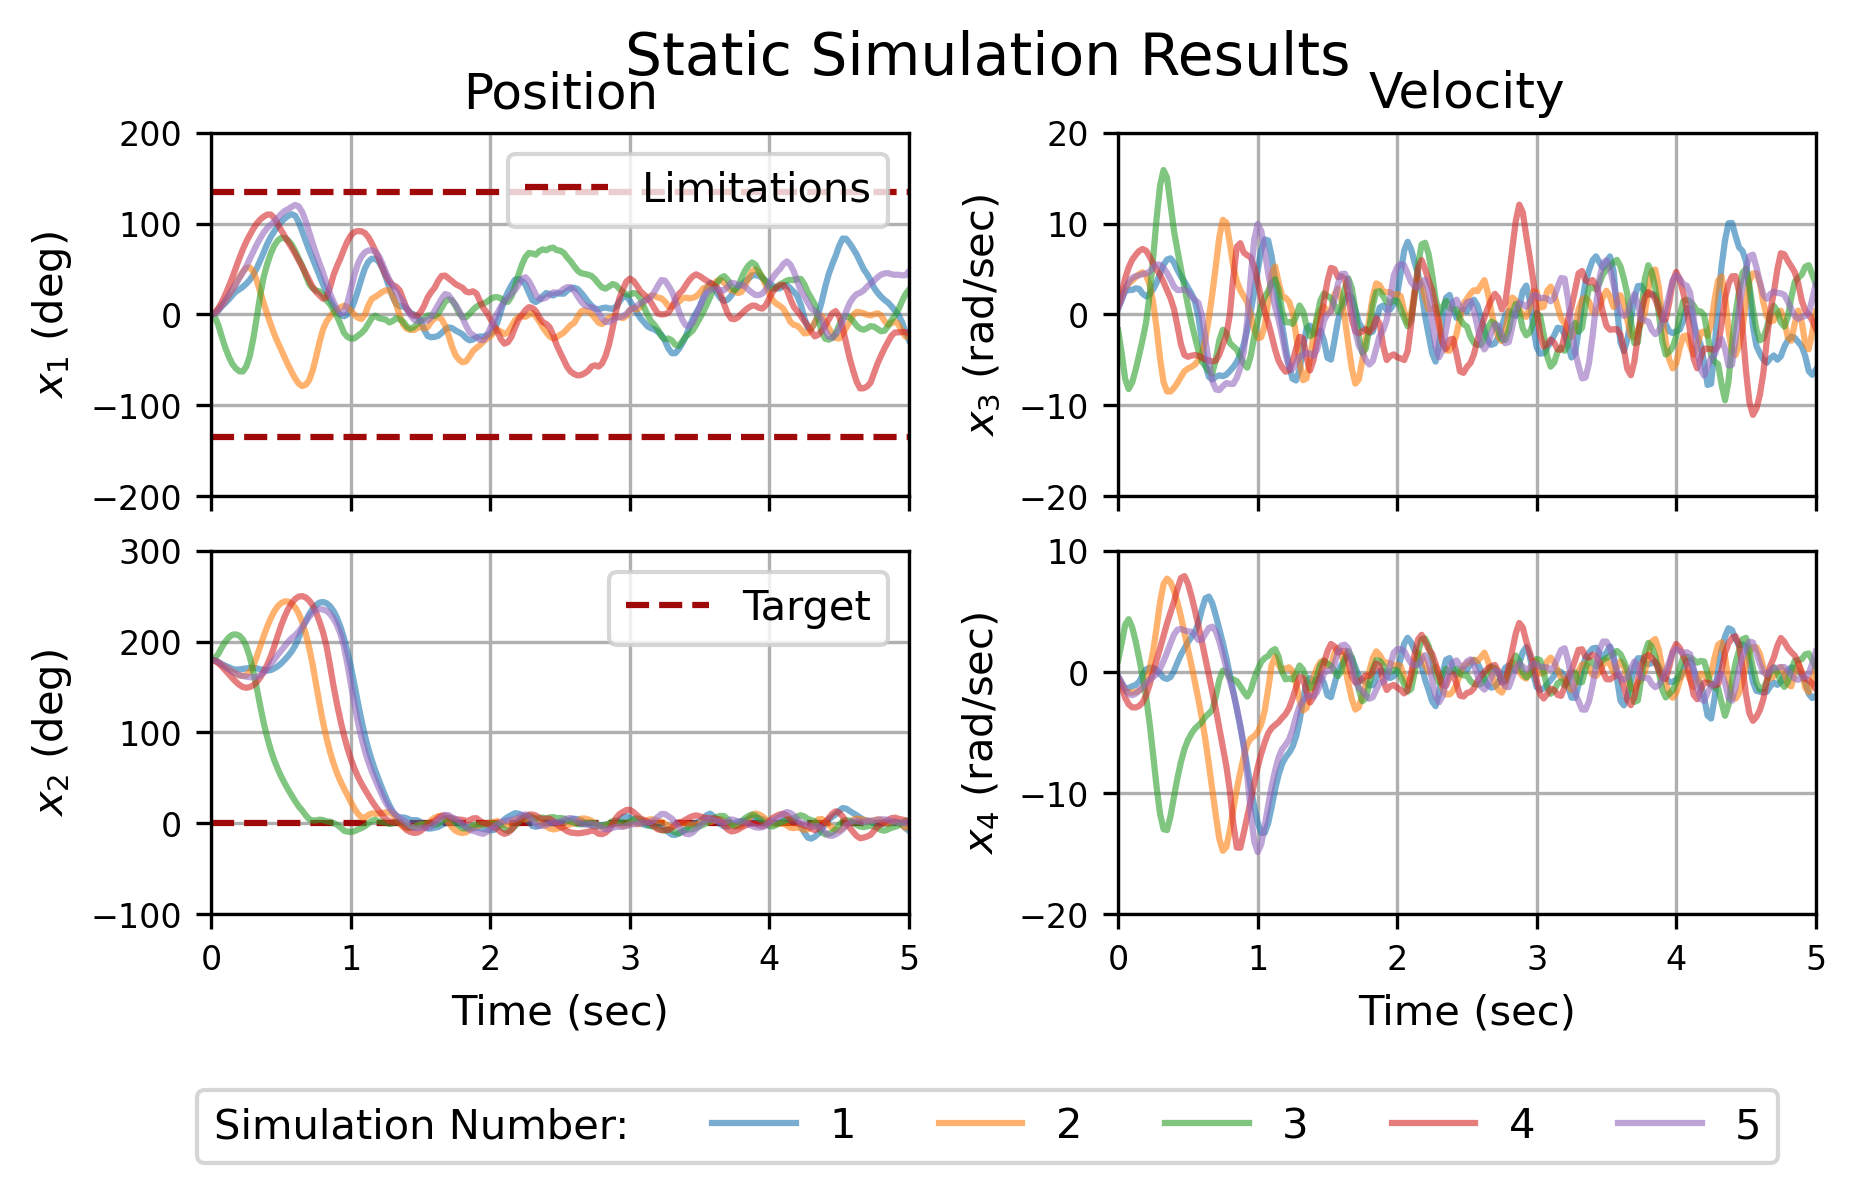

In [12]:
# plotting all simulation static_results
fig = plt.figure(figsize = [6.9, 3.45])

gs = GridSpec(2, 2, wspace= 0.3, hspace=0.15, width_ratios=[1, 1], height_ratios=[1, 1])

# subplots
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1, 1])


# red lines + legend
ax1.axhline(135, color = red_col, linestyle = 'dashed')
ax1.axhline(-135, color = red_col, linestyle = 'dashed')
ax3.axhline(0, color = red_col, linestyle = 'dashed')
ax1.legend(['Limitations'], loc='upper right')
ax3.legend(['Target'], loc='upper right')

static_results_list = [static_results_1, static_results_2, static_results_3, static_results_4, static_results_5]

count = 1
for j in static_results_list:
    # smoothed theta dot static_results
    t_dot_s = gaussian_filter1d(j.theta_dot, sigma=1)
    # smoothed alpha dot static_results
    a_dot_s = gaussian_filter1d(j.alpha_dot, sigma=1)
    # plotting 
    ax1.plot(j.time, np.rad2deg(j.theta), alpha=0.6)
    ax2.plot(j.time, t_dot_s, alpha=0.6)
    ax3.plot(j.time, np.rad2deg(j.alpha), alpha=0.6)
    ax4.plot(j.time, a_dot_s, label='{:.0f}'.format(count), alpha=0.6)
    count += 1
    
for ax in fig.get_axes():
    ax.grid()
    ax.set_xlim(left=min(static_data.time), right=max(static_data.time))
    ax.tick_params(axis='both', labelsize=8)
    
# axis labels
ax1.set_ylabel(r'$x_1$ (deg)', size = 10)
ax2.set_ylabel(r'$x_3$ (rad/sec)', size = 10)
ax3.set_ylabel(r'$x_2$ (deg)', size = 10)
ax4.set_ylabel(r'$x_4$ (rad/sec)', size = 10)

ax1.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])
ax3.set_xlabel(r'Time (sec)', size = 10)
ax4.set_xlabel(r'Time (sec)', size = 10)

# titles
fig.suptitle('Static Simulation Results', size = 14)
ax1.set_title(r'Position', size = 12)
ax2.set_title(r'Velocity', size = 12)

# legend
legend = fig.legend(title = 'Simulation Number:', loc = 'center', ncol=5, borderaxespad=0.1, bbox_to_anchor=(0.5 , -0.08))
legend_title_left(legend)

# save and show
plt.savefig('static_sim_results.png', bbox_inches='tight')
plt.show()

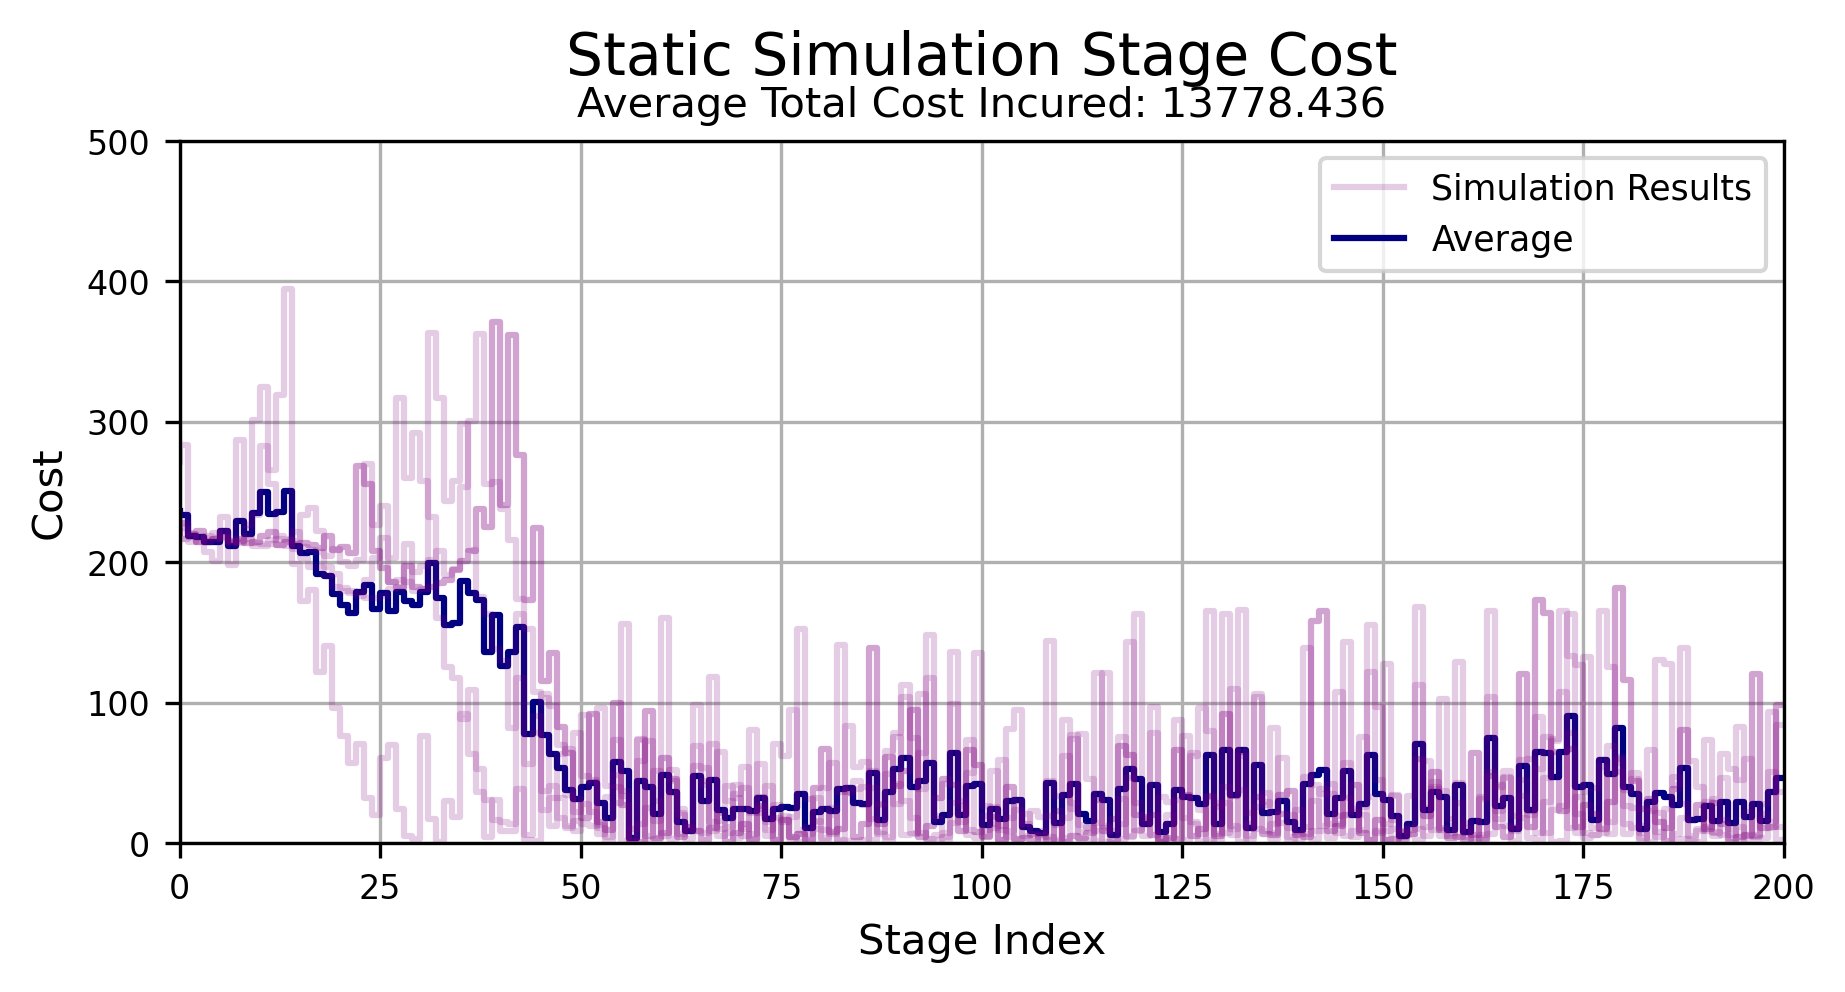

In [13]:
fig,ax=plt.subplots(1,1, figsize = [6.9, 3.1])

ax.step(static_results_1.index.to_numpy(), static_results_1.stage_cost, color='purple', alpha=0.2)

# average
mean_stage_cost = np.zeros(result_length)
count = 0
for i in static_results_1.time:
    mean_stage_cost[count] = sum(static_grouped_time.get_group(i).stage_cost)/5
    count += 1

ax.step(static_results_1.index.to_numpy(), mean_stage_cost, color='navy', alpha=1)

ax.step(static_results_1.index.to_numpy(), static_results_1.stage_cost, color='purple', alpha=0.2)
ax.step(static_results_2.index.to_numpy(), static_results_2.stage_cost, color='purple', alpha=0.2)
ax.step(static_results_3.index.to_numpy(), static_results_3.stage_cost, color='purple', alpha=0.2)
ax.step(static_results_4.index.to_numpy(), static_results_4.stage_cost, color='purple', alpha=0.2)
ax.step(static_results_5.index.to_numpy(), static_results_5.stage_cost, color='purple', alpha=0.2)

# labels
ax.set_xlabel('Stage Index', size = 10)
ax.set_ylabel('Cost', size = 10)

# axis
ax.tick_params(axis='both', labelsize=8)
ax.set_xlim(left=0, right=max(static_results_1.index.to_numpy()))
ax.set_ylim(bottom=0)
ax.grid()

#legend
ax.legend(['Simulation Results', 'Average'], fontsize = 'small')

# calculate average for title
total_cost = sum(mean_stage_cost)
total_cost_str = 'Average Total Cost Incured: %.3f' %total_cost

# titles
mid = (fig.subplotpars.right + fig.subplotpars.left)/2
fig.suptitle('Static Simulation Stage Cost', size = 14, y = 1, x = mid)
ax.set_title(total_cost_str, ha='center', fontsize=10)

# save and show
plt.savefig('static_stagecost.png', bbox_inches='tight')
plt.show()

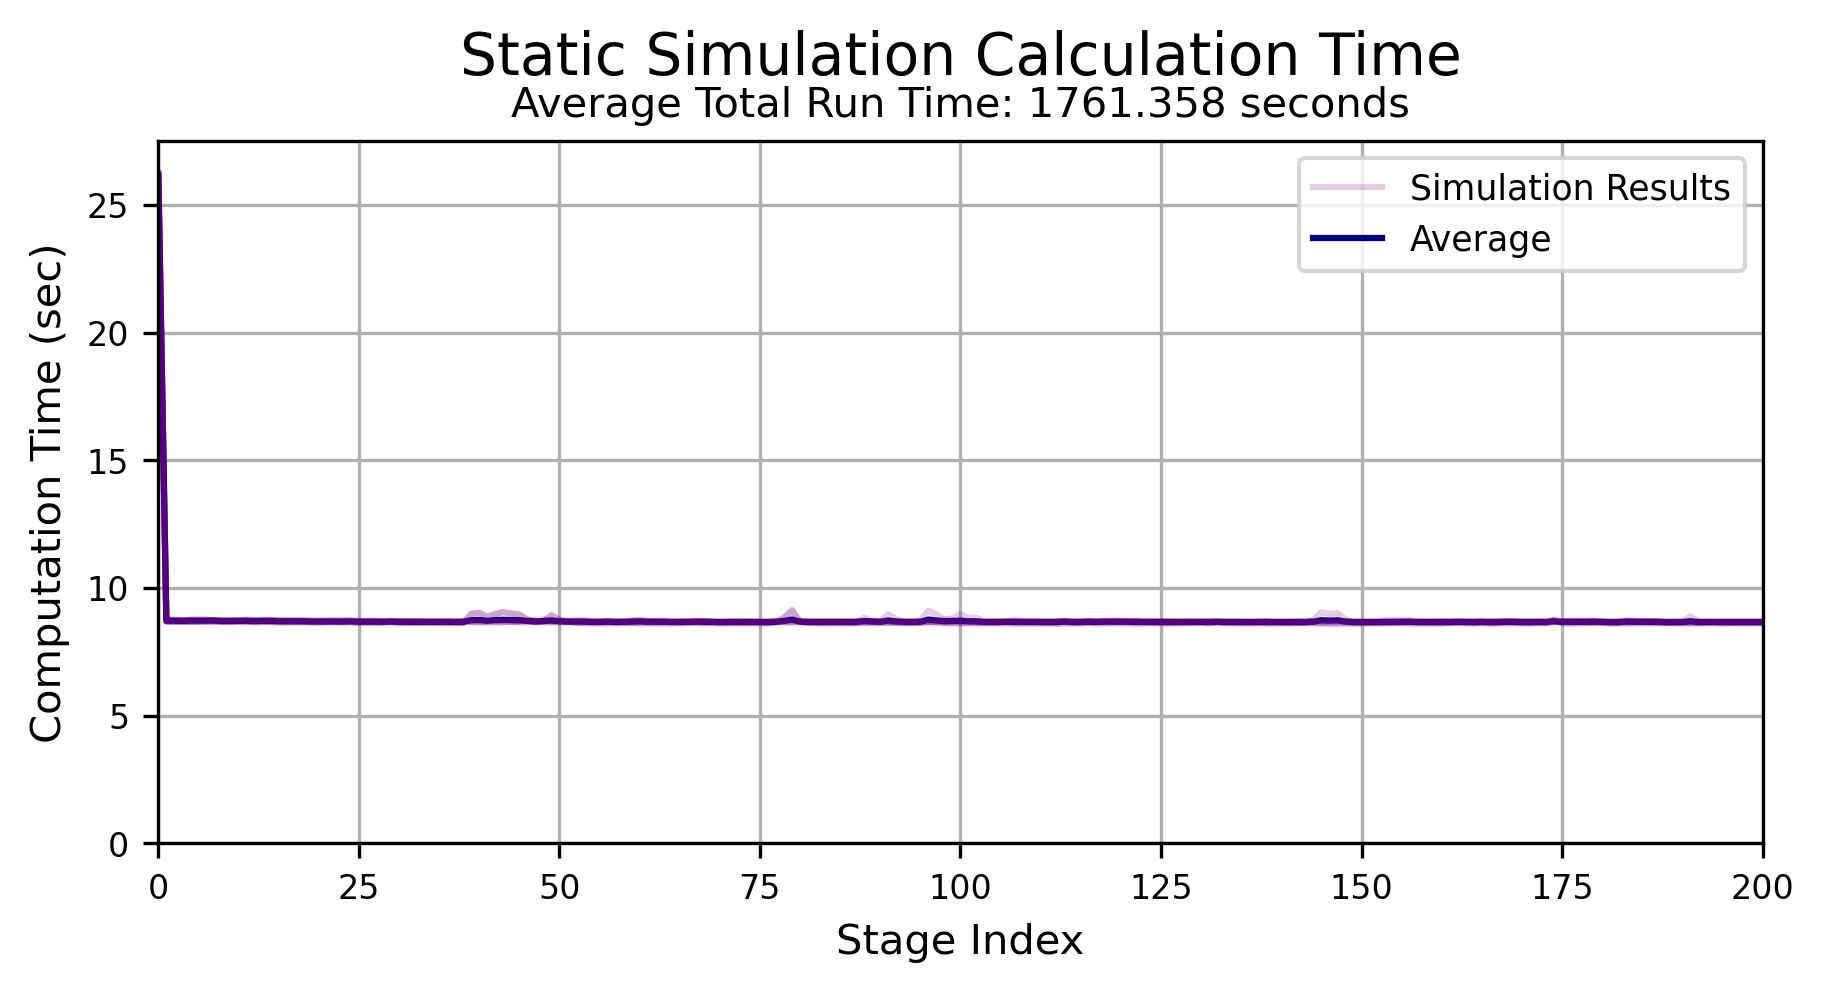

In [14]:
fig, ax = plt.subplots(1,1, figsize = [6.9, 3.1])

# first result
ax.plot(static_results_1.time/0.025, static_results_1.calc_time, color='purple', alpha=0.2)

# average result
mean_calc_time = np.zeros(result_length)
count = 0
for i in static_results_1.time:
    mean_calc_time[count] = sum(static_grouped_time.get_group(i).calc_time)/5
    count += 1

ax.plot(static_results_2.time/0.025, mean_calc_time, 'navy')

# other static_results
ax.plot(static_results_1.time/0.025, static_results_1.calc_time, color='purple', alpha=0.2)
ax.plot(static_results_2.time/0.025, static_results_2.calc_time, color='purple', alpha=0.2)
ax.plot(static_results_3.time/0.025, static_results_3.calc_time, color='purple', alpha=0.2)
ax.plot(static_results_4.time/0.025, static_results_4.calc_time, color='purple', alpha=0.2)
ax.plot(static_results_5.time/0.025, static_results_5.calc_time, color='purple', alpha=0.2)

# labels
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Stage Index', size = 10)
ax.set_ylabel('Computation Time (sec)', size = 10)
ax.set_xlim(left=min(static_data.time), right=max(static_data.time)/0.025)
ax.set_ylim(bottom=0)

# axis
ax.tick_params(axis='both', labelsize=8)
ax.set_xlim(left=0, right=max(static_results_1.index.to_numpy()))
ax.set_ylim(bottom=0)
ax.grid()

#legend
ax.legend(['Simulation Results', 'Average'], fontsize = 'small')

# calculate average for title
total_time = sum(mean_calc_time)
total_time_str = 'Average Total Run Time: %.3f seconds' %total_time

# titles
mid = (fig.subplotpars.right + fig.subplotpars.left)/2
fig.suptitle('Static Simulation Calculation Time', size = 14, y = 1, x = mid)
ax.set_title(total_time_str, ha='center', fontsize=10)

# save and show
plt.savefig('static_computation_time.png', bbox_inches='tight')
plt.show()


Select interested simulation numbers as a list to view only that result for the following plots.

static_results_list = [static_results_1, static_results_2, static_results_3, static_results_4, static_results_5]

In [15]:
static_results_list = [static_results_3]

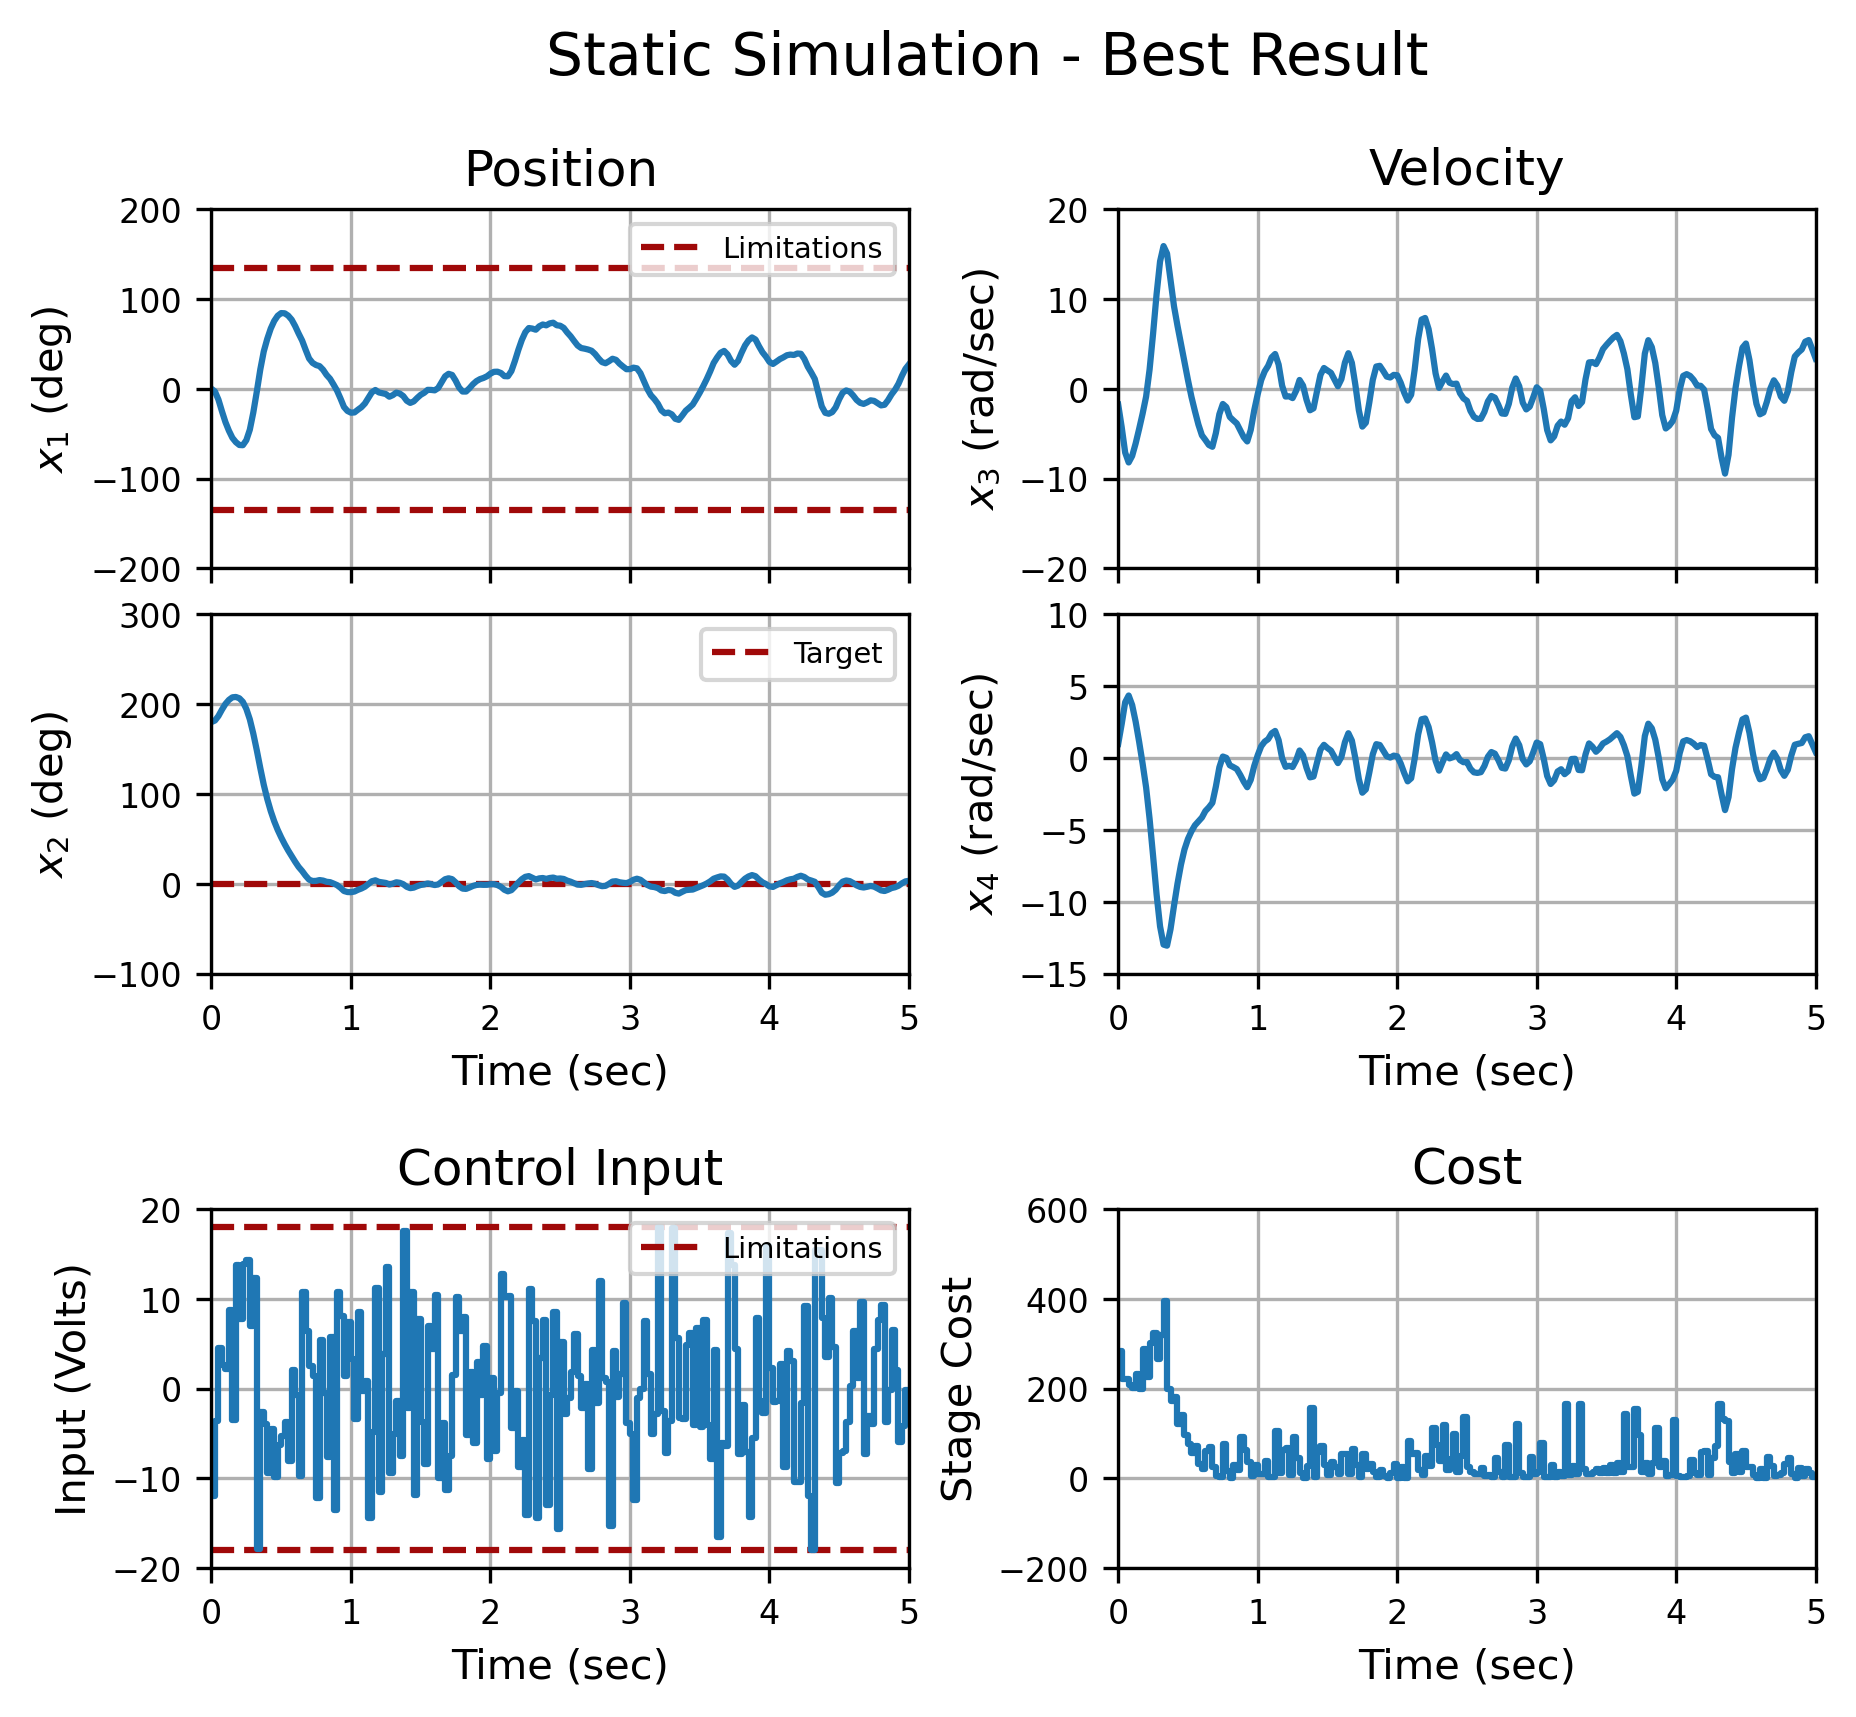

In [16]:
# plotting full cost function
fig = plt.figure(figsize = [6.9, 6])

gs = GridSpec(4, 2, wspace= 0.3, hspace=0.15, width_ratios=[1, 1], height_ratios=[1, 1, 0.4, 1])

# subplots
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1, 1])
ax5 = plt.subplot(gs[3, 0])
ax6 = plt.subplot(gs[3, 1])


# red lines + legend
ax1.axhline(135, color = red_col, linestyle = 'dashed')
ax1.axhline(-135, color = red_col, linestyle = 'dashed')
ax3.axhline(0, color = red_col, linestyle = 'dashed')
ax5.axhline(18, color = red_col, linestyle = 'dashed')
ax5.axhline(-18, color = red_col, linestyle = 'dashed')
ax1.legend(['Limitations'], loc='upper right', fontsize = 'x-small')
ax3.legend(['Target'], loc='upper right', fontsize = 'x-small')
ax5.legend(['Limitations'], loc='upper right', fontsize = 'x-small')

count = 1
for j in static_results_list:
    # smoothed theta dot static_results
    t_dot_s = gaussian_filter1d(j.theta_dot, sigma=1)
    # smoothed alpha dot static_results
    a_dot_s = gaussian_filter1d(j.alpha_dot, sigma=1)
    # plotting 
    ax1.plot(j.time, np.rad2deg(j.theta))
    ax2.plot(j.time, t_dot_s)
    ax3.plot(j.time, np.rad2deg(j.alpha))
    ax4.plot(j.time, a_dot_s, label='{:.0f}'.format(count))
    ax5.step(j.time, j.control)
    ax6.step(j.time, j.stage_cost)
    count += 1
    
for ax in fig.get_axes():
    ax.grid()
    ax.set_xlim(left=min(static_data.time), right=max(static_data.time))
    ax.tick_params(axis='both', labelsize=8)

# axis labels
ax1.set_ylabel(r'$x_1$ (deg)', size = 10)
ax2.set_ylabel(r'$x_3$ (rad/sec)', size = 10)
ax3.set_ylabel(r'$x_2$ (deg)', size = 10)
ax4.set_ylabel(r'$x_4$ (rad/sec)', size = 10)
ax5.set_ylabel(r'Input (Volts)', size = 10)
ax6.set_ylabel(r'Stage Cost', size = 10)


ax1.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])
ax3.set_xlabel(r'Time (sec)', size = 10)
ax4.set_xlabel(r'Time (sec)', size = 10)
ax5.set_xlabel(r'Time (sec)', size = 10)
ax6.set_xlabel(r'Time (sec)', size = 10)

# titles
fig.suptitle('Static Simulation - Best Result', size = 14)
ax1.set_title(r'Position', size = 12)
ax2.set_title(r'Velocity', size = 12)
ax5.set_title(r'Control Input', size = 12)
ax6.set_title(r'Cost', size = 12)

# save and show
plt.savefig('static_best_sim_results.png', bbox_inches='tight')
plt.show()

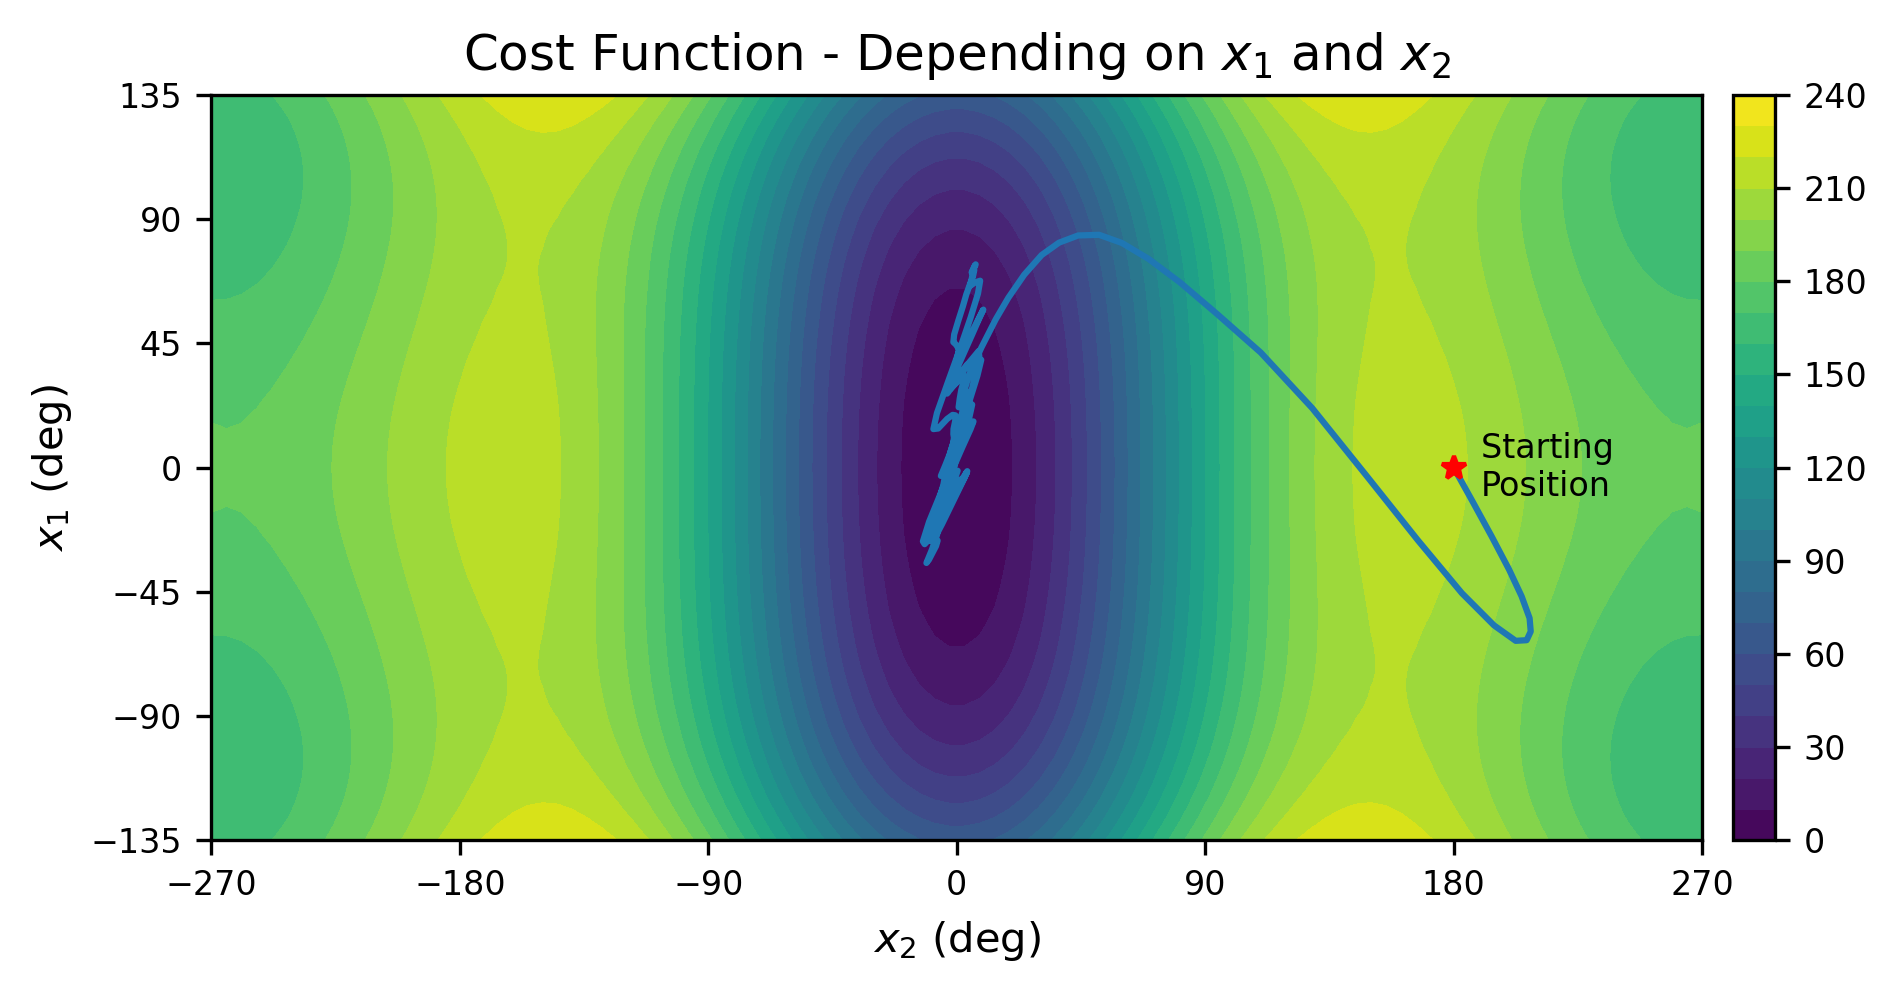

In [17]:
# calculating contour plot values
min_x1 = -135
max_x1 = 135
min_x2 = -270
max_x2 = 270


x1_list = np.linspace(np.deg2rad(min_x1), np.deg2rad(max_x1), 100)
x2_list = np.linspace(np.deg2rad(min_x2), np.deg2rad(max_x2), 100)
x1, x2 = np.meshgrid(x1_list, x2_list)

for i in range(100):
    for j in range(100):
        Z[i][j] =  cost_function(np.array([x1_list[j], x2_list[i], 0, 0]), 0)

# plotting full cost function
fig = plt.figure()

gs1 = GridSpec(1, 2, wspace= 0.05, hspace=0.6, width_ratios=[20, 1], height_ratios=[1])

# contour intervals and step size 
step_size = 30
max_int = int(np.ceil(np.max(Z)/step_size))*step_size
level_def = np.arange(0, max_int+10, 10, dtype= np.int32)

# contour plot
ax = plt.subplot(gs1[0, 0])
ax.set_aspect(aspect=1)
cp = ax.contourf(np.rad2deg(x2), np.rad2deg(x1), Z, levels = level_def, vmin = 0, vmax = max_int)

# plot path
static_results_list = [static_results_3]
for j in static_results_list:
    ax.plot(np.rad2deg(j.alpha), np.rad2deg(j.theta))

# starting position marker & label
ax.plot(180, 0, 'r*')
ax.annotate("Starting \nPosition", (190, 0), size = 8, va = 'center', ha = 'left')

# axis limits
ax.axis(xmin = min_x2, xmax = max_x2, ymin = min_x1, ymax = max_x1)

# colour bars
ax_cp = plt.subplot(gs1[0, 1])
col = plt.colorbar(cp, cax = ax_cp)

# labels
ax.set_title(r'Cost Function - Depending on $x_1$ and $x_2$', size = 12)
ax.set_xlabel(r'$x_2$ (deg)', size = 10)
ax.set_ylabel(r'$x_1$ (deg)', size = 10)

# axis limits
ax.set_xticks(np.linspace(min_x2, max_x2, 7, dtype = np.int32))
ax.set_yticks(np.linspace(min_x1, max_x1, 7, dtype = np.int32))

# axis font size
ax.tick_params(axis='both', labelsize=8)
ax_cp.tick_params(axis='both', labelsize=8)

# adjust colour plot to be same length
contour_size = ax.get_position().get_points()
cb_size = ax_cp.get_position().get_points()
cb_size[0, 1] = contour_size[0, 1]
cb_size[1, 1] = contour_size[1, 1]
cb_size[0, 0] = contour_size[1, 0] + 0.015
cb_size[1, 0] = cb_size[0, 0] + 0.02
ax_cp.set_position(Bbox(cb_size))

# save and show
plt.savefig('static_tracking.png', bbox_inches='tight')
plt.show()

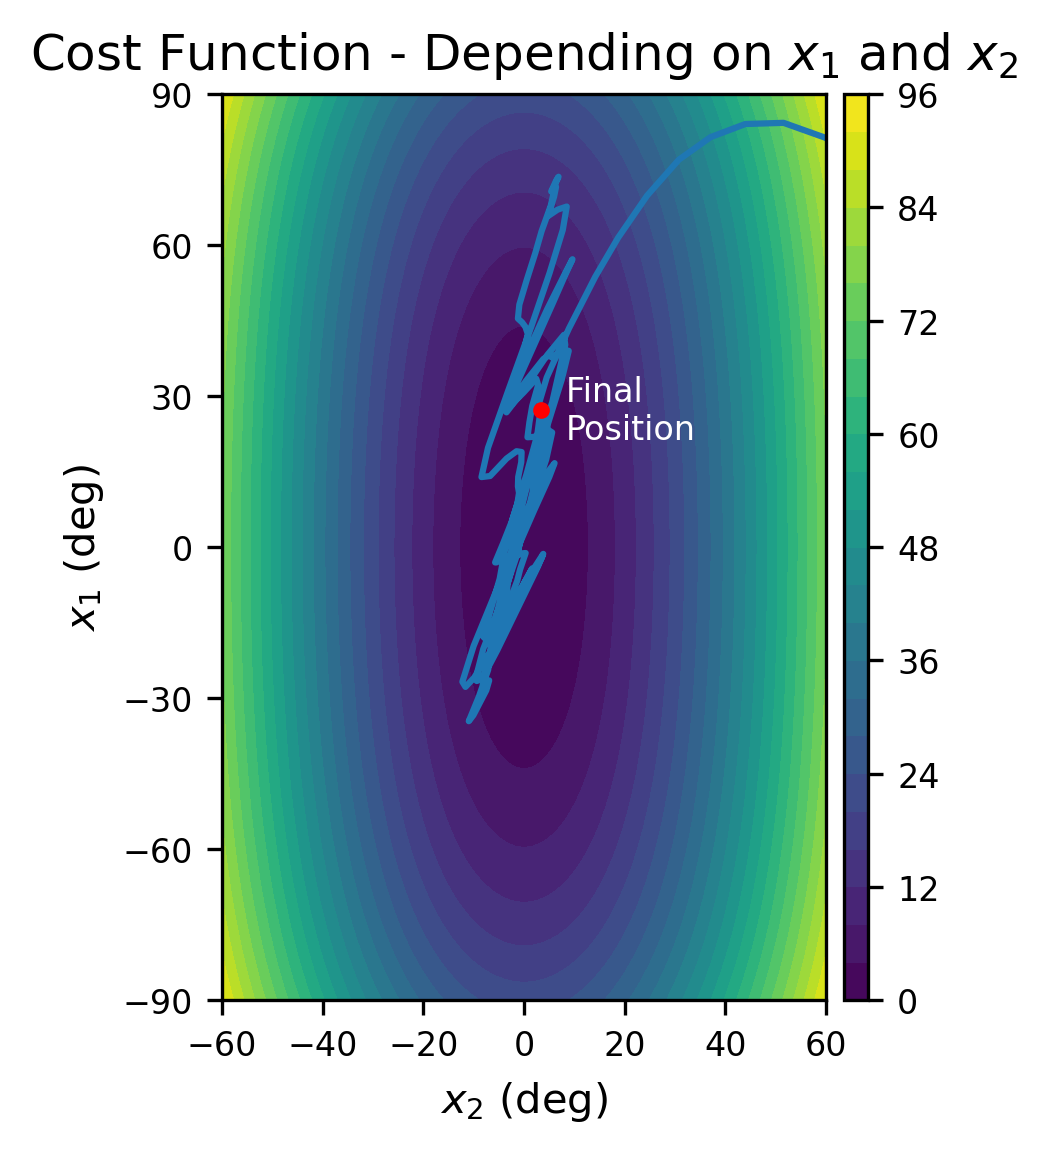

In [18]:
# calculating contour plot values

min_x1 = -90
max_x1 = 90
min_x2 = -60
max_x2 = 60


x1_list = np.linspace(np.deg2rad(min_x1), np.deg2rad(max_x1), 100)
x2_list = np.linspace(np.deg2rad(min_x2), np.deg2rad(max_x2), 100)
x1, x2 = np.meshgrid(x1_list, x2_list)

for i in range(100):
    for j in range(100):
        Z[i][j] =  cost_function(np.array([x1_list[j], x2_list[i], 0, 0]), 0)

# plotting full cost function
#fig = plt.figure()
fig = plt.figure(figsize = [4, 4])

gs1 = GridSpec(1, 2, wspace= 0.0, hspace=0.6, width_ratios=[20, 1], height_ratios=[1])

# contour plot
ax = plt.subplot(gs1[0, 0])
ax.set_aspect(aspect=1)
cp = ax.contourf(np.rad2deg(x2), np.rad2deg(x1), Z, levels = 25)

# axis limits
ax.axis(xmin = min_x2, xmax = max_x2, ymin = min_x1, ymax = max_x1)

# plot path
static_results_list = [static_results_3]
for j in static_results_list:
    line, = ax.plot(np.rad2deg(j.alpha), np.rad2deg(j.theta))
    
    # final position marker & label
    x1_final = np.rad2deg(j.iloc[-1].theta)
    x2_final = np.rad2deg(j.iloc[-1].alpha)

    ax.plot(x2_final, x1_final, color = 'r', marker='o', markersize=3)
    ax.annotate("Final \nPosition", (x2_final + 5, x1_final), size = 8, va = 'center', ha = 'left', color='w')

# colour bars
ax_cp = plt.subplot(gs1[0, 1])
col = plt.colorbar(cp, cax = ax_cp)

# labels
ax.set_title(r'Cost Function - Depending on $x_1$ and $x_2$', size = 12)
ax.set_xlabel(r'$x_2$ (deg)', size = 10)
ax.set_ylabel(r'$x_1$ (deg)', size = 10)

ax.set_xticks(np.linspace(min_x2, max_x2, 7, dtype = np.int32))
ax.set_yticks(np.linspace(min_x1, max_x1, 7, dtype = np.int32))

# axis font size
ax.tick_params(axis='both', labelsize=8)
ax_cp.tick_params(axis='both', labelsize=8)

# adjust colour plot to be same length
contour_size = ax.get_position().get_points()
cb_size = ax_cp.get_position().get_points()
cb_size[0, 1] = contour_size[0, 1]
cb_size[1, 1] = contour_size[1, 1]
cb_size[0, 0] = contour_size[1, 0] + 0.015
cb_size[1, 0] = cb_size[0, 0] + 0.02
ax_cp.set_position(Bbox(cb_size))

# save and show
plt.savefig('static_closetracking.png', bbox_inches='tight')
plt.show()

# Dynamic Simulation Data Analysis

In [19]:
dynamic_data= pd.read_csv("dynamic_results.csv")
result_length = int(max(dynamic_data.time)/0.025 + 1)
dynamic_grouped_time = dynamic_data.groupby('time')

In [20]:
# seperate runs 
dynamic_results_1 = dynamic_data.loc[0*result_length:1*result_length - 1]
dynamic_results_2 = dynamic_data.loc[1*result_length:2*result_length - 1]
dynamic_results_3 = dynamic_data.loc[2*result_length:3*result_length - 1]
dynamic_results_4 = dynamic_data.loc[3*result_length:4*result_length - 1]
dynamic_results_5 = dynamic_data.loc[4*result_length:5*result_length - 1]

# replace indexs
new_index = pd.Series(np.linspace(0, result_length-1, result_length), dtype = np.int32)

dynamic_results_1 = dynamic_results_1.set_index(new_index)
dynamic_results_2 = dynamic_results_2.set_index(new_index)
dynamic_results_3 = dynamic_results_3.set_index(new_index)
dynamic_results_4 = dynamic_results_4.set_index(new_index)
dynamic_results_5 = dynamic_results_5.set_index(new_index)

In [21]:
dynamic_results_list = [dynamic_results_1, dynamic_results_2, dynamic_results_3, dynamic_results_4, dynamic_results_5]

count = 1
for j in dynamic_results_list:
    total_costs = sum(j.stage_cost)
    total_time = sum(j.calc_time)
    print(f'Total Cost for Simulation {count}:', '{:.3f}'.format(total_costs), 'Run Time: {:.3f}'.format(total_time))
    count += 1
    
print(f'\nAverage Cost:', '{:.3f}'.format(sum(dynamic_data.stage_cost)/5), 'Average Run Time: {:.3f}'.format(sum(dynamic_data.calc_time)/5))

Total Cost for Simulation 1: 9119.291 Run Time: 636.829
Total Cost for Simulation 2: 13707.266 Run Time: 772.065
Total Cost for Simulation 3: 9132.661 Run Time: 634.341
Total Cost for Simulation 4: 15432.524 Run Time: 761.849
Total Cost for Simulation 5: 9449.961 Run Time: 641.131

Average Cost: 11368.341 Average Run Time: 689.243


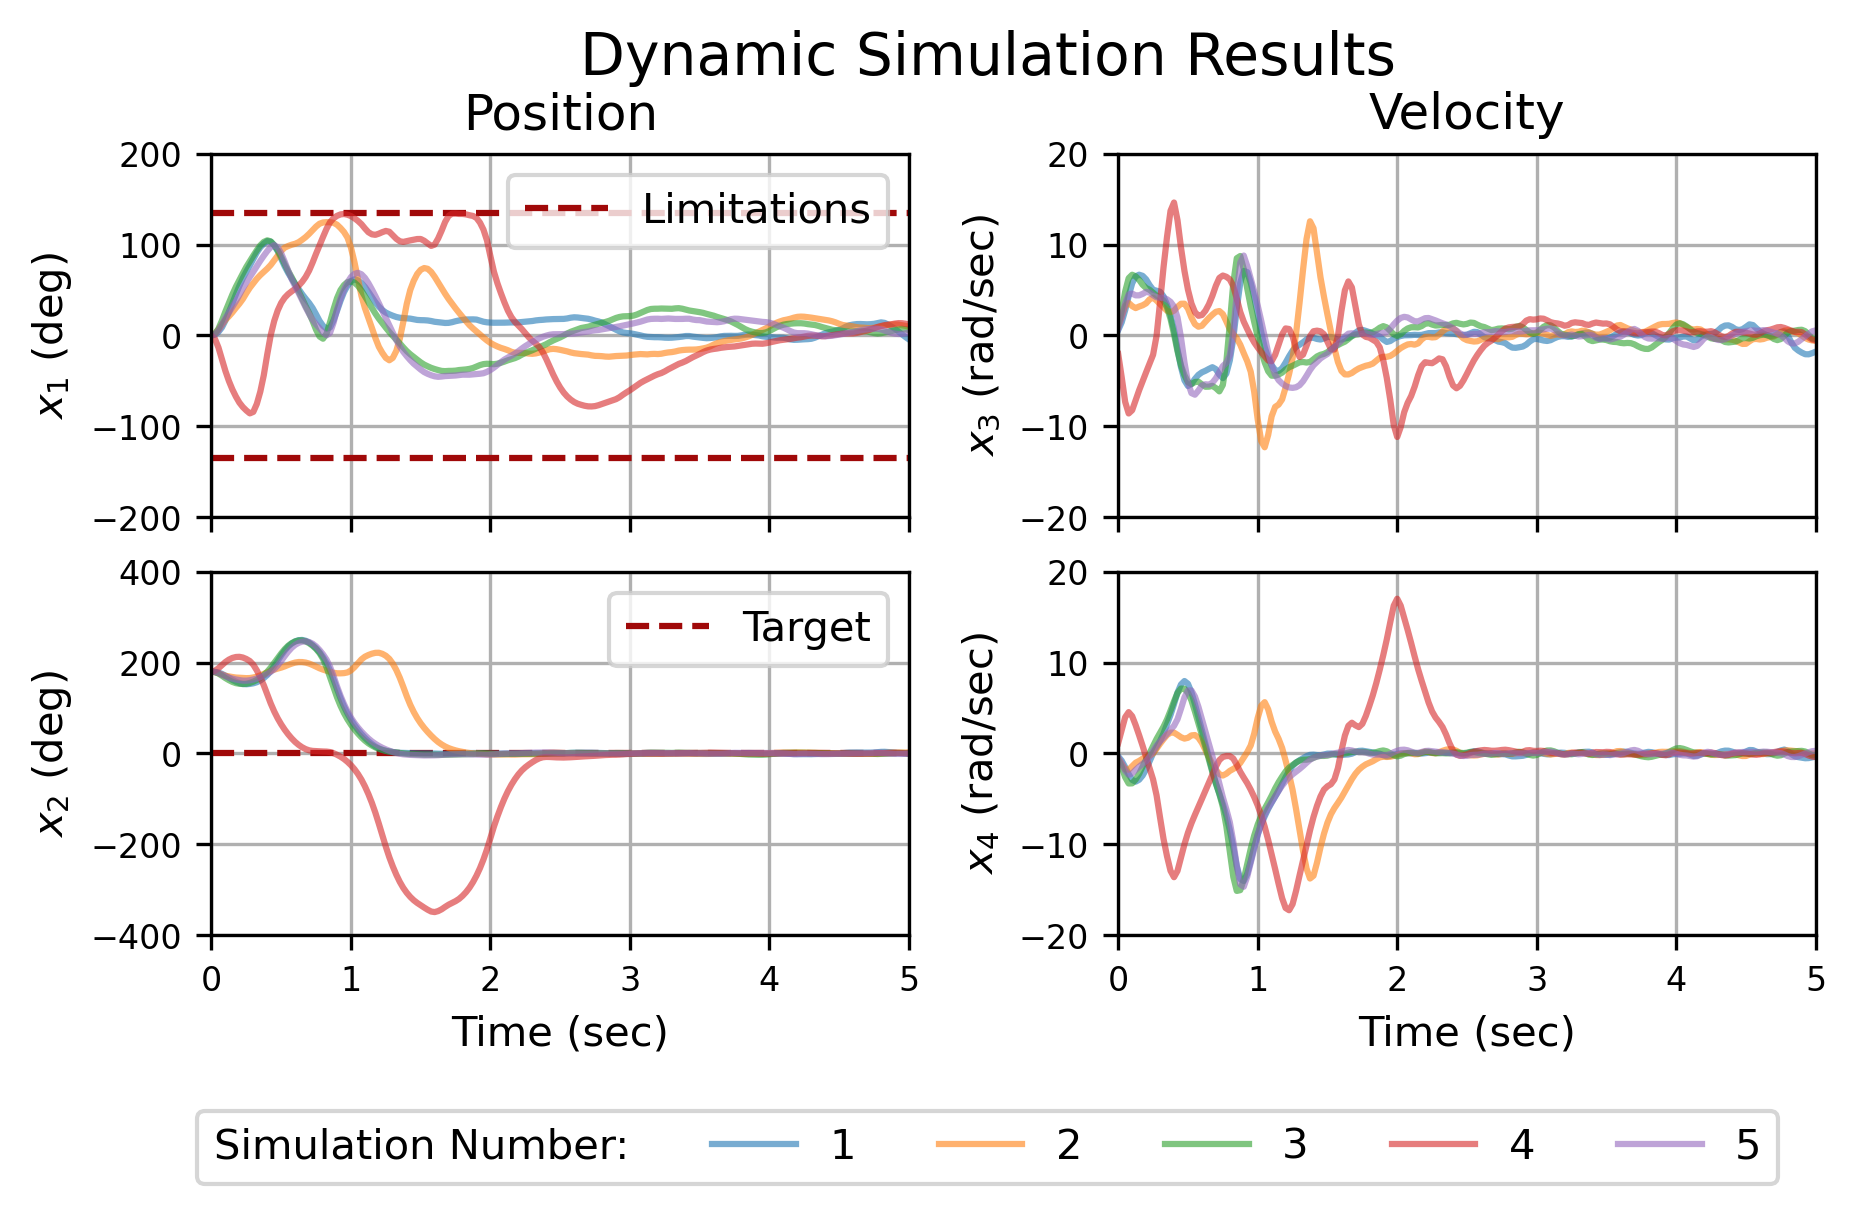

In [22]:
# plotting all simulation dynamic_results
fig = plt.figure(figsize = [6.9, 3.45])

gs = GridSpec(2, 2, wspace= 0.3, hspace=0.15, width_ratios=[1, 1], height_ratios=[1, 1])

# subplots
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1, 1])


# red lines + legend
ax1.axhline(135, color = red_col, linestyle = 'dashed')
ax1.axhline(-135, color = red_col, linestyle = 'dashed')
ax3.axhline(0, color = red_col, linestyle = 'dashed')
ax1.legend(['Limitations'], loc='upper right')
ax3.legend(['Target'], loc='upper right')

dynamic_results_list = [dynamic_results_1, dynamic_results_2, dynamic_results_3, dynamic_results_4, dynamic_results_5]

count = 1
for j in dynamic_results_list:
    # smoothed theta dot dynamic_results
    t_dot_s = gaussian_filter1d(j.theta_dot, sigma=1)
    # smoothed alpha dot dynamic_results
    a_dot_s = gaussian_filter1d(j.alpha_dot, sigma=1)
    # plotting 
    ax1.plot(j.time, np.rad2deg(j.theta), alpha=0.6)
    ax2.plot(j.time, t_dot_s, alpha=0.6)
    ax3.plot(j.time, np.rad2deg(j.alpha), alpha=0.6)
    ax4.plot(j.time, a_dot_s, label='{:.0f}'.format(count), alpha=0.6)
    count += 1
    
for ax in fig.get_axes():
    ax.grid()
    ax.set_xlim(left=min(dynamic_data.time), right=max(dynamic_data.time))
    ax.tick_params(axis='both', labelsize=8)
    
# axis labels
ax1.set_ylabel(r'$x_1$ (deg)', size = 10)
ax2.set_ylabel(r'$x_3$ (rad/sec)', size = 10)
ax3.set_ylabel(r'$x_2$ (deg)', size = 10)
ax4.set_ylabel(r'$x_4$ (rad/sec)', size = 10)

ax1.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])
ax3.set_xlabel(r'Time (sec)', size = 10)
ax4.set_xlabel(r'Time (sec)', size = 10)

# titles
fig.suptitle('Dynamic Simulation Results', size = 14, y=1)
ax1.set_title(r'Position', size = 12)
ax2.set_title(r'Velocity', size = 12)

# legend
legend = fig.legend(title = 'Simulation Number:', loc = 'center', ncol=5, borderaxespad=0.1, bbox_to_anchor=(0.5 , -0.08))
legend_title_left(legend)

# save and show
plt.savefig('dynamic_sim_results.png', bbox_inches='tight')
plt.show()

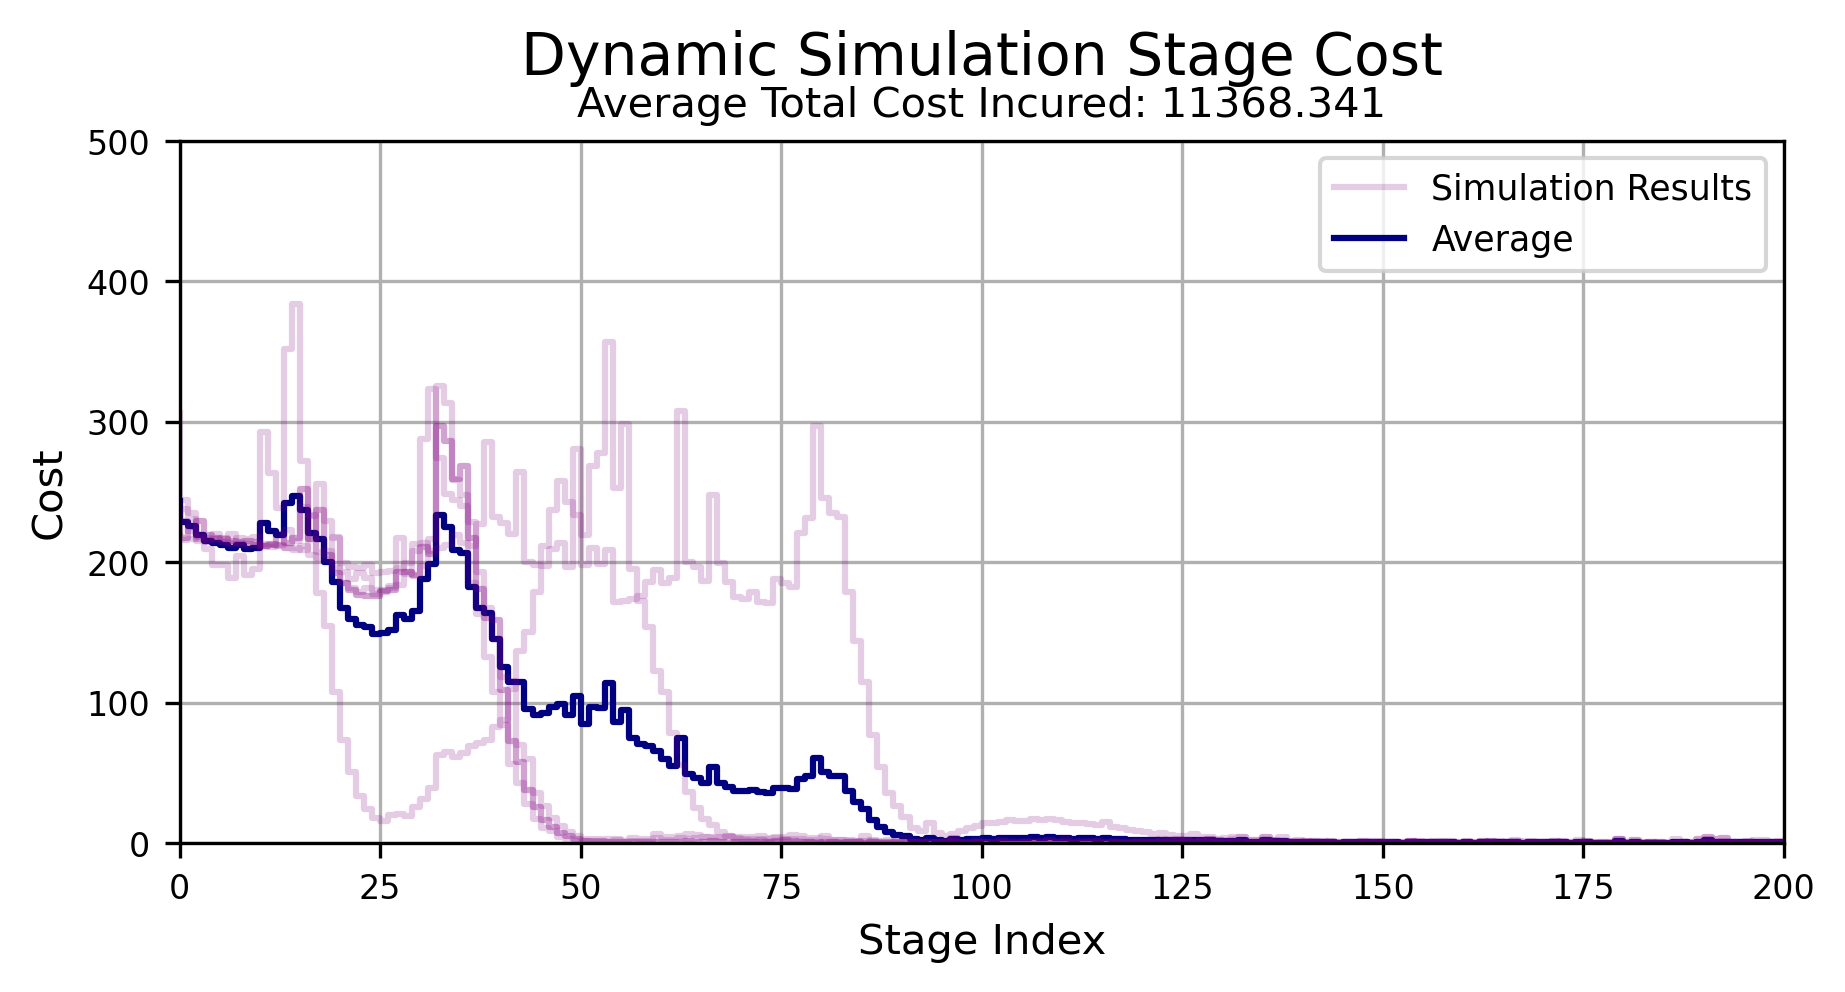

In [23]:
fig,ax=plt.subplots(1,1, figsize = [6.9, 3.1])

ax.step(dynamic_results_1.index.to_numpy(), dynamic_results_1.stage_cost, color='purple', alpha=0.2)

# average
mean_stage_cost = np.zeros(result_length)
count = 0
for i in dynamic_results_1.time:
    mean_stage_cost[count] = sum(dynamic_grouped_time.get_group(i).stage_cost)/5
    count += 1

ax.step(dynamic_results_1.index.to_numpy(), mean_stage_cost, color='navy', alpha=1)

ax.step(dynamic_results_1.index.to_numpy(), dynamic_results_1.stage_cost, color='purple', alpha=0.2)
ax.step(dynamic_results_2.index.to_numpy(), dynamic_results_2.stage_cost, color='purple', alpha=0.2)
ax.step(dynamic_results_3.index.to_numpy(), dynamic_results_3.stage_cost, color='purple', alpha=0.2)
ax.step(dynamic_results_4.index.to_numpy(), dynamic_results_4.stage_cost, color='purple', alpha=0.2)
ax.step(dynamic_results_5.index.to_numpy(), dynamic_results_5.stage_cost, color='purple', alpha=0.2)

# labels
ax.set_xlabel('Stage Index', size = 10)
ax.set_ylabel('Cost', size = 10)

# axis
ax.tick_params(axis='both', labelsize=8)
ax.set_xlim(left=0, right=max(dynamic_results_1.index.to_numpy()))
ax.set_ylim(bottom=0)
ax.grid()

#legend
ax.legend(['Simulation Results', 'Average'], fontsize = 'small')

# calculate average for title
total_cost = sum(mean_stage_cost)
total_cost_str = 'Average Total Cost Incured: %.3f' %total_cost

# titles
mid = (fig.subplotpars.right + fig.subplotpars.left)/2
fig.suptitle('Dynamic Simulation Stage Cost', size = 14, y = 1, x = mid)
ax.set_title(total_cost_str, ha='center', fontsize=10)

# save and show
plt.savefig('dynamic_stagecost.png', bbox_inches='tight')
plt.show()

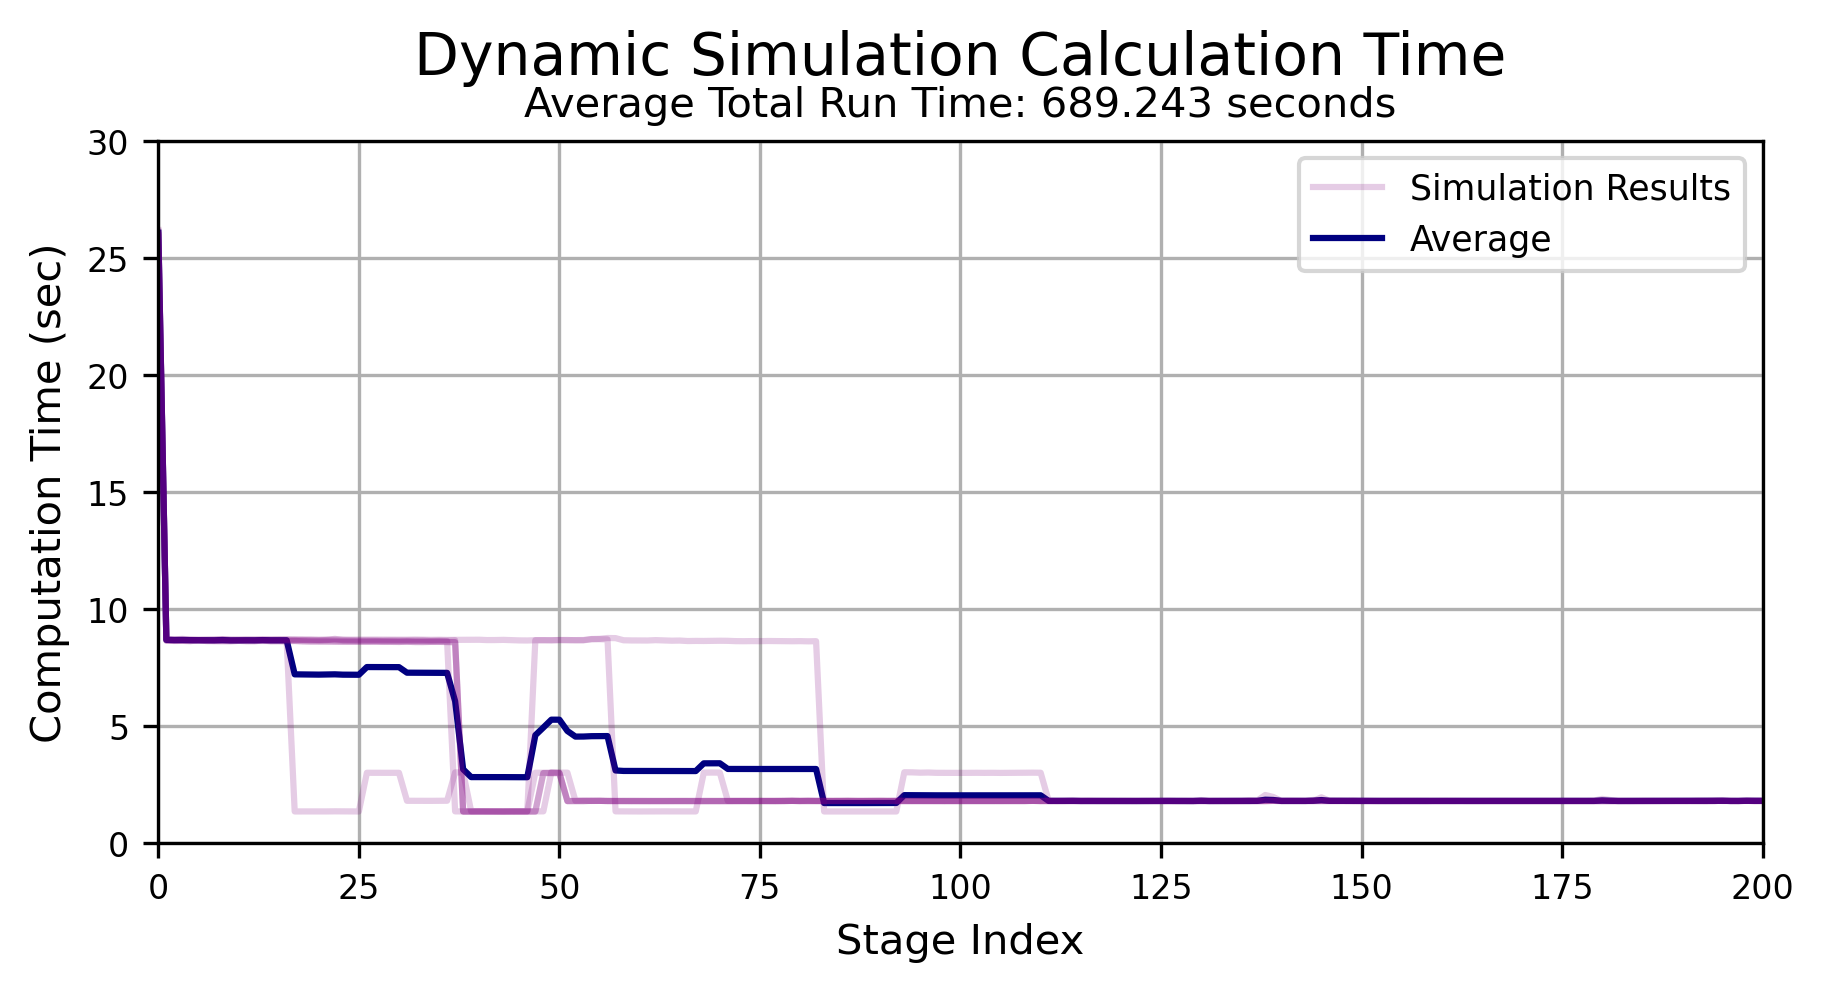

In [24]:
fig, ax = plt.subplots(1,1, figsize = [6.9, 3.1])

# first result
ax.plot(dynamic_results_1.time/0.025, dynamic_results_1.calc_time, color='purple', alpha=0.2)

# average result
mean_calc_time = np.zeros(result_length)
count = 0
for i in dynamic_results_1.time:
    mean_calc_time[count] = sum(dynamic_grouped_time.get_group(i).calc_time)/5
    count += 1

ax.plot(dynamic_results_2.time/0.025, mean_calc_time, 'navy')

# other dynamic_results
ax.plot(dynamic_results_1.time/0.025, dynamic_results_1.calc_time, color='purple', alpha=0.2)
ax.plot(dynamic_results_2.time/0.025, dynamic_results_2.calc_time, color='purple', alpha=0.2)
ax.plot(dynamic_results_3.time/0.025, dynamic_results_3.calc_time, color='purple', alpha=0.2)
ax.plot(dynamic_results_4.time/0.025, dynamic_results_4.calc_time, color='purple', alpha=0.2)
ax.plot(dynamic_results_5.time/0.025, dynamic_results_5.calc_time, color='purple', alpha=0.2)

# labels
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel('Stage Index', size = 10)
ax.set_ylabel('Computation Time (sec)', size = 10)
ax.set_xlim(left=min(dynamic_data.time), right=max(dynamic_data.time)/0.025)
ax.set_ylim(bottom=0)

# axis
ax.set_xlim(left=0, right=max(dynamic_results_1.index.to_numpy()))
ax.set_ylim(bottom=0)
ax.grid()

#legend
ax.legend(['Simulation Results', 'Average'], fontsize = 'small')

# calculate average for title
total_time = sum(mean_calc_time)
total_time_str = 'Average Total Run Time: %.3f seconds' %total_time

# titles
mid = (fig.subplotpars.right + fig.subplotpars.left)/2
fig.suptitle('Dynamic Simulation Calculation Time', size = 14, y = 1, x = mid)
ax.set_title(total_time_str, ha='center', fontsize=10)

# save and show
plt.savefig('dynamic_computation_time.png', bbox_inches='tight')
plt.show()


Select interested simulation numbers as a list to view only that result for the following plots.

dynamic_results_list = [dynamic_results_1, dynamic_results_2, dynamic_results_3, dynamic_results_4, dynamic_results_5]

In [25]:
dynamic_results_list = [dynamic_results_1]

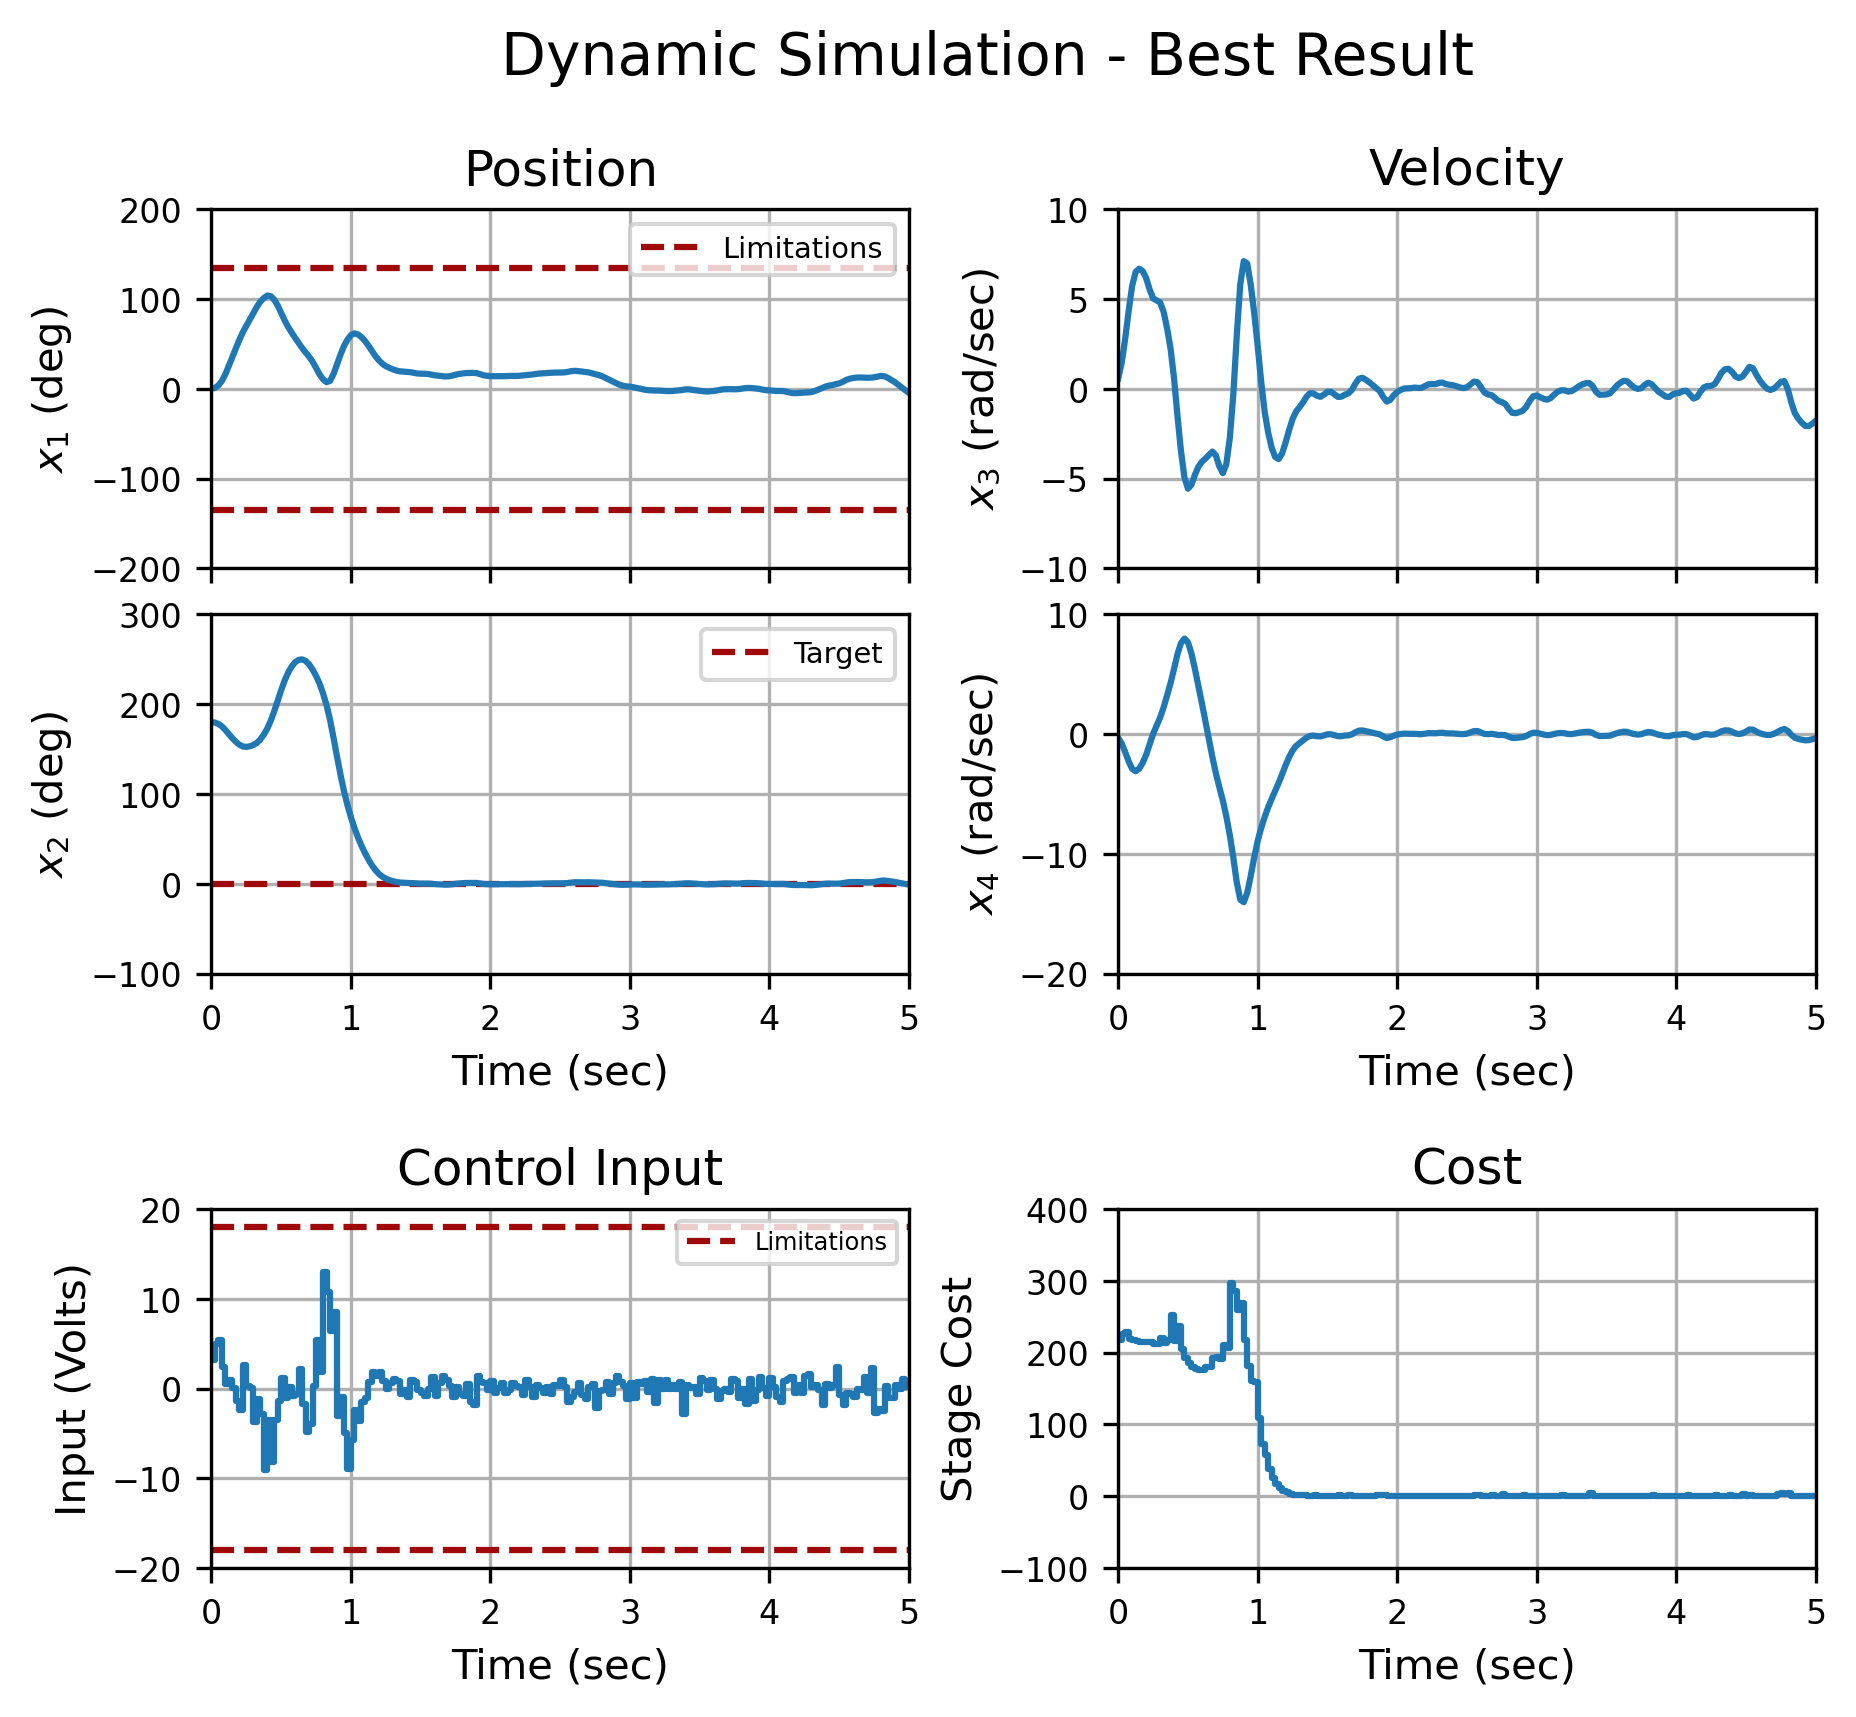

In [26]:
# plotting full cost function
fig = plt.figure(figsize = [6.9, 6])

gs = GridSpec(4, 2, wspace= 0.3, hspace=0.15, width_ratios=[1, 1], height_ratios=[1, 1, 0.4, 1])

# subplots
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 0])
ax4 = plt.subplot(gs[1, 1])
ax5 = plt.subplot(gs[3, 0])
ax6 = plt.subplot(gs[3, 1])


# red lines + legend
ax1.axhline(135, color = red_col, linestyle = 'dashed')
ax1.axhline(-135, color = red_col, linestyle = 'dashed')
ax3.axhline(0, color = red_col, linestyle = 'dashed')
ax5.axhline(18, color = red_col, linestyle = 'dashed')
ax5.axhline(-18, color = red_col, linestyle = 'dashed')
ax1.legend(['Limitations'], loc='upper right', fontsize = 'x-small')
ax3.legend(['Target'], loc='upper right', fontsize = 'x-small')
ax5.legend(['Limitations'], loc='upper right', fontsize = 'xx-small')

count = 1
for j in dynamic_results_list:
    # smoothed theta dot dynamic_results
    t_dot_s = gaussian_filter1d(j.theta_dot, sigma=1)
    # smoothed alpha dot dynamic_results
    a_dot_s = gaussian_filter1d(j.alpha_dot, sigma=1)
    # plotting 
    ax1.plot(j.time, np.rad2deg(j.theta))
    ax2.plot(j.time, t_dot_s)
    ax3.plot(j.time, np.rad2deg(j.alpha))
    ax4.plot(j.time, a_dot_s, label='{:.0f}'.format(count))
    ax5.step(j.time, j.control)
    ax6.step(j.time, j.stage_cost)
    count += 1
    
for ax in fig.get_axes():
    ax.grid()
    ax.set_xlim(left=min(dynamic_data.time), right=max(dynamic_data.time))
    ax.tick_params(axis='both', labelsize=8)

# axis labels
ax1.set_ylabel(r'$x_1$ (deg)', size = 10)
ax2.set_ylabel(r'$x_3$ (rad/sec)', size = 10)
ax3.set_ylabel(r'$x_2$ (deg)', size = 10)
ax4.set_ylabel(r'$x_4$ (rad/sec)', size = 10)
ax5.set_ylabel(r'Input (Volts)', size = 10)
ax6.set_ylabel(r'Stage Cost', size = 10)


ax1.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])
ax3.set_xlabel(r'Time (sec)', size = 10)
ax4.set_xlabel(r'Time (sec)', size = 10)
ax5.set_xlabel(r'Time (sec)', size = 10)
ax6.set_xlabel(r'Time (sec)', size = 10)

# titles
fig.suptitle('Dynamic Simulation - Best Result', size = 14)
ax1.set_title(r'Position', size = 12)
ax2.set_title(r'Velocity', size = 12)
ax5.set_title(r'Control Input', size = 12)
ax6.set_title(r'Cost', size = 12)

# save and show
plt.savefig('dynamic_best_sim_results.png', bbox_inches='tight')
plt.show()

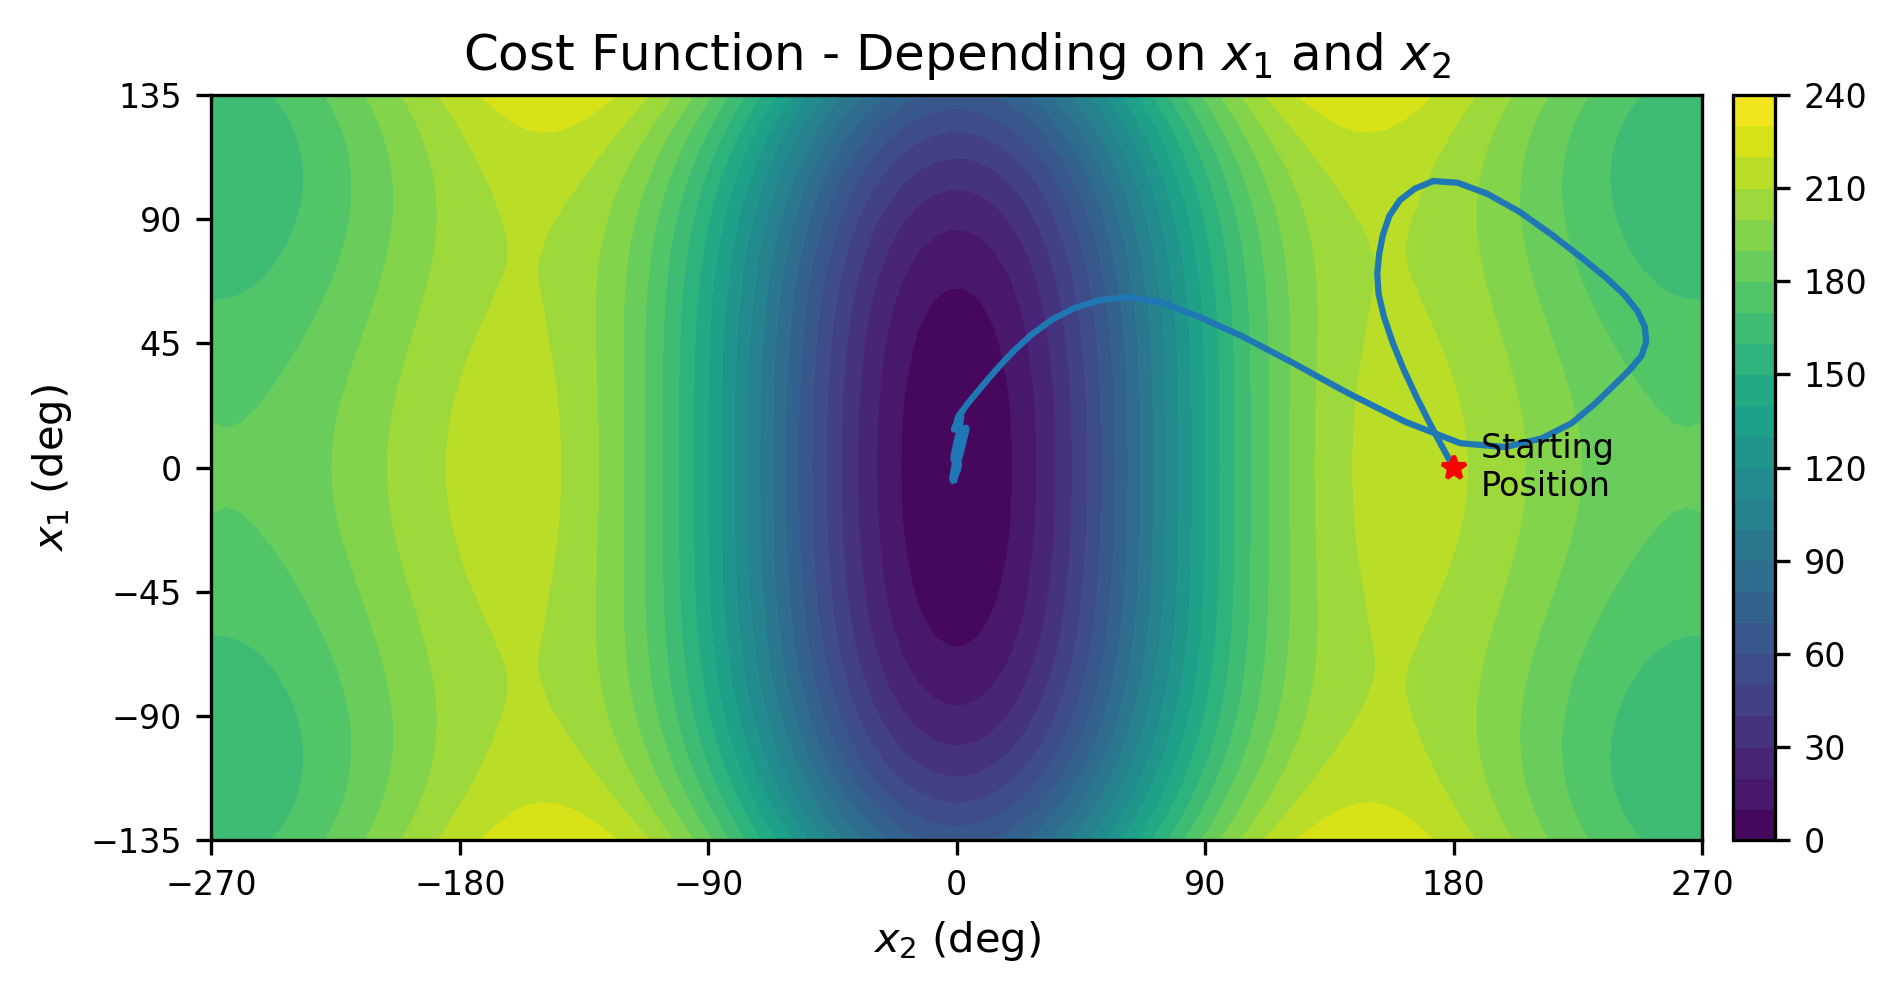

In [27]:
# calculating contour plot values
min_x1 = -135
max_x1 = 135
min_x2 = -270
max_x2 = 270


x1_list = np.linspace(np.deg2rad(min_x1), np.deg2rad(max_x1), 100)
x2_list = np.linspace(np.deg2rad(min_x2), np.deg2rad(max_x2), 100)
x1, x2 = np.meshgrid(x1_list, x2_list)

for i in range(100):
    for j in range(100):
        Z[i][j] =  cost_function(np.array([x1_list[j], x2_list[i], 0, 0]), 0)

# plotting full cost function
fig = plt.figure()

gs1 = GridSpec(1, 2, wspace= 0.05, hspace=0.6, width_ratios=[20, 1], height_ratios=[1])

# contour intervals and step size 
step_size = 30
max_int = int(np.ceil(np.max(Z)/step_size))*step_size
level_def = np.arange(0, max_int+10, 10, dtype= np.int32)

# contour plot
ax = plt.subplot(gs1[0, 0])
ax.set_aspect(aspect=1)
cp = ax.contourf(np.rad2deg(x2), np.rad2deg(x1), Z, levels = level_def, vmin = 0, vmax = max_int)

# plot path
for j in dynamic_results_list:
    ax.plot(np.rad2deg(j.alpha), np.rad2deg(j.theta))

# starting position marker & label
ax.plot(180, 0, 'r*')
ax.annotate("Starting \nPosition", (190, 0), size = 8, va = 'center', ha = 'left')

# axis limits
ax.axis(xmin = min_x2, xmax = max_x2, ymin = min_x1, ymax = max_x1)

# colour bars
ax_cp = plt.subplot(gs1[0, 1])
col = plt.colorbar(cp, cax = ax_cp)

# labels
ax.set_title(r'Cost Function - Depending on $x_1$ and $x_2$', size = 12)
ax.set_xlabel(r'$x_2$ (deg)', size = 10)
ax.set_ylabel(r'$x_1$ (deg)', size = 10)

# axis limits
ax.set_xticks(np.linspace(min_x2, max_x2, 7, dtype = np.int32))
ax.set_yticks(np.linspace(min_x1, max_x1, 7, dtype = np.int32))

# axis font size
ax.tick_params(axis='both', labelsize=8)
ax_cp.tick_params(axis='both', labelsize=8)

# adjust colour plot to be same length
contour_size = ax.get_position().get_points()
cb_size = ax_cp.get_position().get_points()
cb_size[0, 1] = contour_size[0, 1]
cb_size[1, 1] = contour_size[1, 1]
cb_size[0, 0] = contour_size[1, 0] + 0.015
cb_size[1, 0] = cb_size[0, 0] + 0.02
ax_cp.set_position(Bbox(cb_size))

# save and show
plt.savefig('dynamic_tracking.png', bbox_inches='tight')
plt.show()

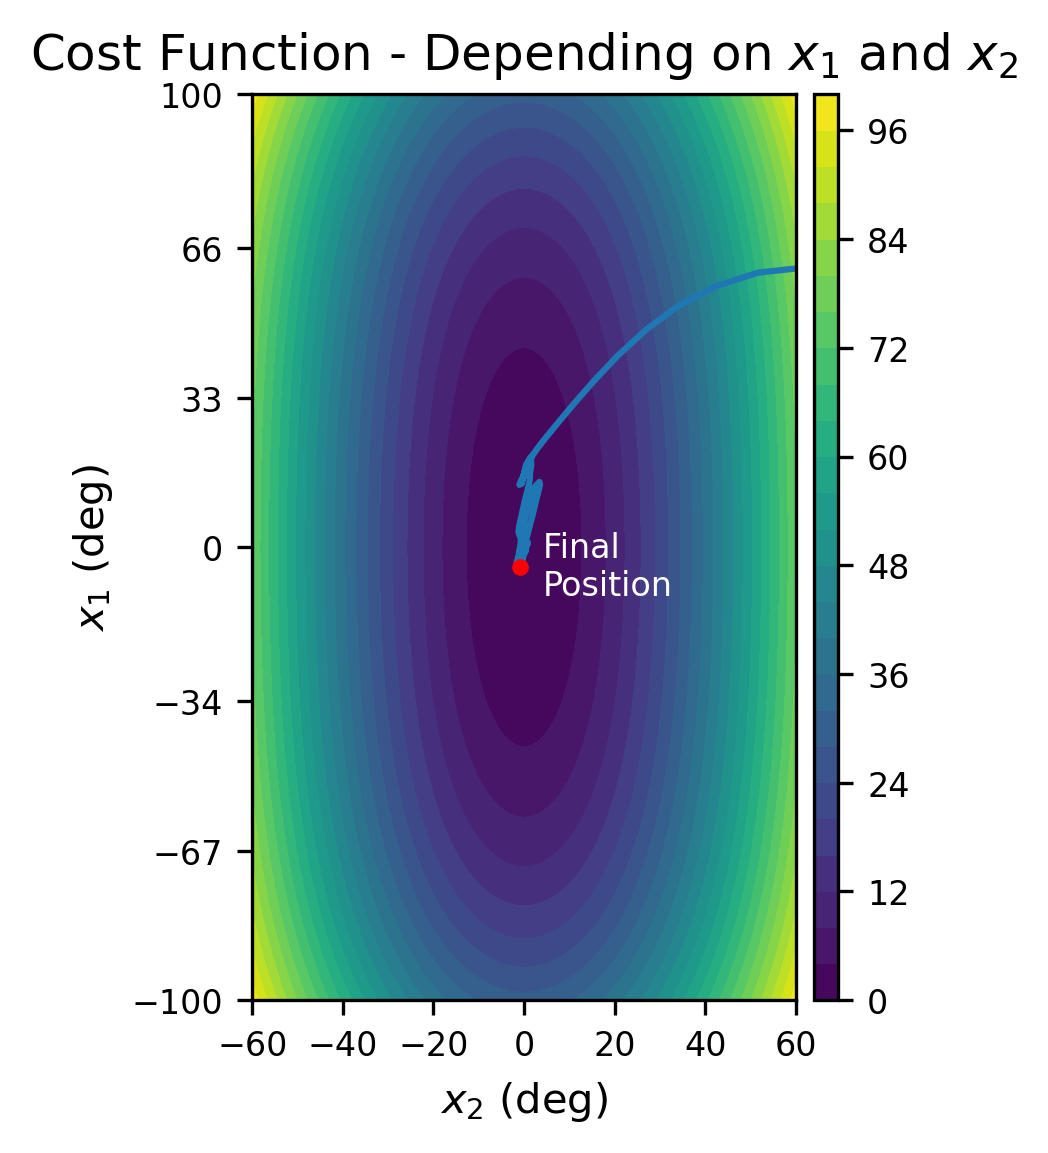

In [28]:
# calculating contour plot values

min_x1 = -100
max_x1 = 100
min_x2 = -60
max_x2 = 60


x1_list = np.linspace(np.deg2rad(min_x1), np.deg2rad(max_x1), 100)
x2_list = np.linspace(np.deg2rad(min_x2), np.deg2rad(max_x2), 100)
x1, x2 = np.meshgrid(x1_list, x2_list)

for i in range(100):
    for j in range(100):
        Z[i][j] =  cost_function(np.array([x1_list[j], x2_list[i], 0, 0]), 0)

# plotting full cost function
#fig = plt.figure()
fig = plt.figure(figsize = [4, 4])

gs1 = GridSpec(1, 2, wspace= 0.0, hspace=0.6, width_ratios=[20, 1], height_ratios=[1])

# contour plot
ax = plt.subplot(gs1[0, 0])
ax.set_aspect(aspect=1)
cp = ax.contourf(np.rad2deg(x2), np.rad2deg(x1), Z, levels = 25)

# axis limits
ax.axis(xmin = min_x2, xmax = max_x2, ymin = min_x1, ymax = max_x1)

# plot path
for j in dynamic_results_list:
    line, = ax.plot(np.rad2deg(j.alpha), np.rad2deg(j.theta))
    
    # final position marker & label
    x1_final = np.rad2deg(j.iloc[-1].theta)
    x2_final = np.rad2deg(j.iloc[-1].alpha)

    ax.plot(x2_final, x1_final, color = 'r', marker='o', markersize=3)
    ax.annotate("Final \nPosition", (x2_final + 5, x1_final), size = 8, va = 'center', ha = 'left', color='w')

# colour bars
ax_cp = plt.subplot(gs1[0, 1])
col = plt.colorbar(cp, cax = ax_cp)

# labels
ax.set_title(r'Cost Function - Depending on $x_1$ and $x_2$', size = 12)
ax.set_xlabel(r'$x_2$ (deg)', size = 10)
ax.set_ylabel(r'$x_1$ (deg)', size = 10)

ax.set_xticks(np.linspace(min_x2, max_x2, 7, dtype = np.int32))
ax.set_yticks(np.linspace(min_x1, max_x1, 7, dtype = np.int32))

# axis font size
ax.tick_params(axis='both', labelsize=8)
ax_cp.tick_params(axis='both', labelsize=8)

# adjust colour plot to be same length
contour_size = ax.get_position().get_points()
cb_size = ax_cp.get_position().get_points()
cb_size[0, 1] = contour_size[0, 1]
cb_size[1, 1] = contour_size[1, 1]
cb_size[0, 0] = contour_size[1, 0] + 0.015
cb_size[1, 0] = cb_size[0, 0] + 0.02
ax_cp.set_position(Bbox(cb_size))

# save and show
plt.savefig('dynamic_closetracking.png', bbox_inches='tight')
plt.show()

Ignore, following makes tables ready to copy and paste into Latex

In [29]:
static_results_list = [static_results_1, static_results_2, static_results_3, static_results_4, static_results_5]

count = 1
for j in static_results_list:
    total_costs = sum(j.stage_cost)
    total_time = sum(j.calc_time)
    print(f'{count} &', '{:.3f}'.format(total_costs), '& {:.3f}'.format(total_time), end = '')
    print("\\\\")
    count += 1

print('\hline')
print(f'Average &', '{:.3f} &'.format(sum(static_data.stage_cost)/5), '{:.3f}'.format(sum(static_data.calc_time)/5), "\\\\")

1 & 15199.361 & 1754.913\\
2 & 13207.059 & 1760.201\\
3 & 11272.173 & 1758.923\\
4 & 14789.284 & 1765.142\\
5 & 14424.304 & 1767.611\\
\hline
Average & 13778.436 & 1761.358 \\


In [30]:
dynamic_results_list = [dynamic_results_1, dynamic_results_2, dynamic_results_3, dynamic_results_4, dynamic_results_5]

count = 1
for j in dynamic_results_list:
    total_costs = sum(j.stage_cost)
    total_time = sum(j.calc_time)
    print(f'{count} &', '{:.3f}'.format(total_costs), '& {:.3f}'.format(total_time), end = '')
    print("\\\\")
    count += 1

print('\hline')
print(f'Average &', '{:.3f}'.format(sum(dynamic_data.stage_cost)/5), '& {:.3f}'.format(sum(dynamic_data.calc_time)/5), "\\\\")

1 & 9119.291 & 636.829\\
2 & 13707.266 & 772.065\\
3 & 9132.661 & 634.341\\
4 & 15432.524 & 761.849\\
5 & 9449.961 & 641.131\\
\hline
Average & 11368.341 & 689.243 \\
